In [64]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from astropy import constants as cst
from astropy import units as u
import healpy as hp

from aqn import *
from constants import *
from survey_parameters import *
from skymap_plotting_functions import *
from aqn_simulation import *

import sys
sys.path.append('../analysis')

from mcmc_models import *

In [2]:
def plot_cube(x, unit_label, save_name):
    resolution = np.shape(x)[0]
    voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
    voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
    z_slice_min, z_slice_max = [-0.06,0.06]
    mask = (voxel_centers[2] >= z_slice_min) & (voxel_centers[2] < z_slice_max)
    slice_count = np.average(x[:,:,mask], axis=2).value
    # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
    plt.figure(dpi=500)
    plt.imshow(slice_count, extent=[-0.6, 0.6, -0.6, 0.6], norm = matplotlib.colors.LogNorm())
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(unit_label, fontsize=20)
    plt.xlabel('$x$ [kpc]', size=20)
    plt.ylabel('$y$ [kpc]', size=20)
    plt.xticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]),fontsize=15)
    plt.yticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
    
    plt.title(save_name, size=20)
    
    # plt.savefig(save_name+".png", bbox_inches='tight')
    # plt.savefig(save_name+".svg", bbox_inches='tight')
    
    # plt.close()
    plt.show()


# def plot_cube_UV(x, unit_label, save_name):
#     resolution = np.shape(x)[0]
#     voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
#     voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
#     z_slice_min, z_slice_max = [-0.05,0.05]
#     mask = (voxel_centers[2] >= z_slice_min) & (voxel_centers[2] < z_slice_max)
#     slice_count = np.sum(x[:,:,mask], axis=2).value
#     # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
#     plt.figure(dpi=500)
#     plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
    
#     cbar = plt.colorbar()
#     cbar.ax.tick_params(labelsize=15)
#     cbar.set_label(unit_label, fontsize=20)
#     plt.xlabel('$x$ [kpc]', size=20)
#     plt.ylabel('$y$ [kpc]', size=20)
#     plt.xticks(np.array([-7.4,-7.6,-7.8,-8,-8.2,-8.4,-8.6]),fontsize=15)
#     # plt.xticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
#     plt.yticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
#     plt.xlim([-7.4, -8.6])
#     plt.ylim([-0.6,0.6])
#     # plt.xlim([-0.6,0.6])
#     plt.title(save_name, size=20)
    
#     # plt.savefig(save_name+".png", bbox_inches='tight')
#     # plt.savefig(save_name+".svg", bbox_inches='tight')
    
#     # plt.close()
#     plt.show()

def plot_cube_UV(x, unit_label, save_name):
    resolution = np.shape(x)[0]
    voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
    voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
    x_slice_min, x_slice_max = [-0.6,0.6]
    mask = (voxel_centers[0] >= x_slice_min) & (voxel_centers[0] < x_slice_max)
    slice_count = np.sum(x[mask,:,:], axis=0).value # !!!!!
    # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
    plt.figure(dpi=500)
    plt.imshow(slice_count, extent = [-0.6, 0.6, -0.6, 0.6], norm = matplotlib.colors.LogNorm())
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(unit_label, fontsize=20)
    plt.xlabel('$y$ [kpc]', size=20)
    plt.ylabel('$z$ [kpc]', size=20)
    plt.xticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]),fontsize=15)
    plt.yticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
    plt.xlim([-0.6,0.6])
    plt.ylim([-0.6,0.6])
    
    plt.title(save_name, size=20)
    
    plt.savefig("../visuals/"+save_name+".png", bbox_inches='tight')
    plt.savefig("../visuals/"+save_name+".svg", bbox_inches='tight')
    
    # plt.close()
    plt.show()

# def plot_cube(x, unit_label, save_name):
#     resolution = np.shape(x)[0]
#     voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
#     voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
#     z_slice_min, z_slice_max = [-10,10]
#     mask = (voxel_centers[0] >= z_slice_min) & (voxel_centers[0] < z_slice_max)
#     slice_count = np.sum(x[mask,:,:], axis=2).value
#     # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
#     plt.figure(dpi=500)
#     plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
    
#     cbar = plt.colorbar()
#     cbar.ax.tick_params(labelsize=15)
#     cbar.set_label(unit_label, fontsize=20)
#     plt.xlabel('$y$ [kpc]', size=20)
#     plt.ylabel('$z$ [kpc]', size=20)
#     plt.xticks(np.array([-10,-5,0,5,10]),fontsize=15)
#     plt.yticks(np.array([-10,-5,0,5,10]), fontsize=15)
    
#     plt.title(save_name, size=20)
    
#     # plt.savefig(save_name+".png", bbox_inches='tight')
#     # plt.savefig(save_name+".svg", bbox_inches='tight')
    
#     # plt.close()
#     plt.show()

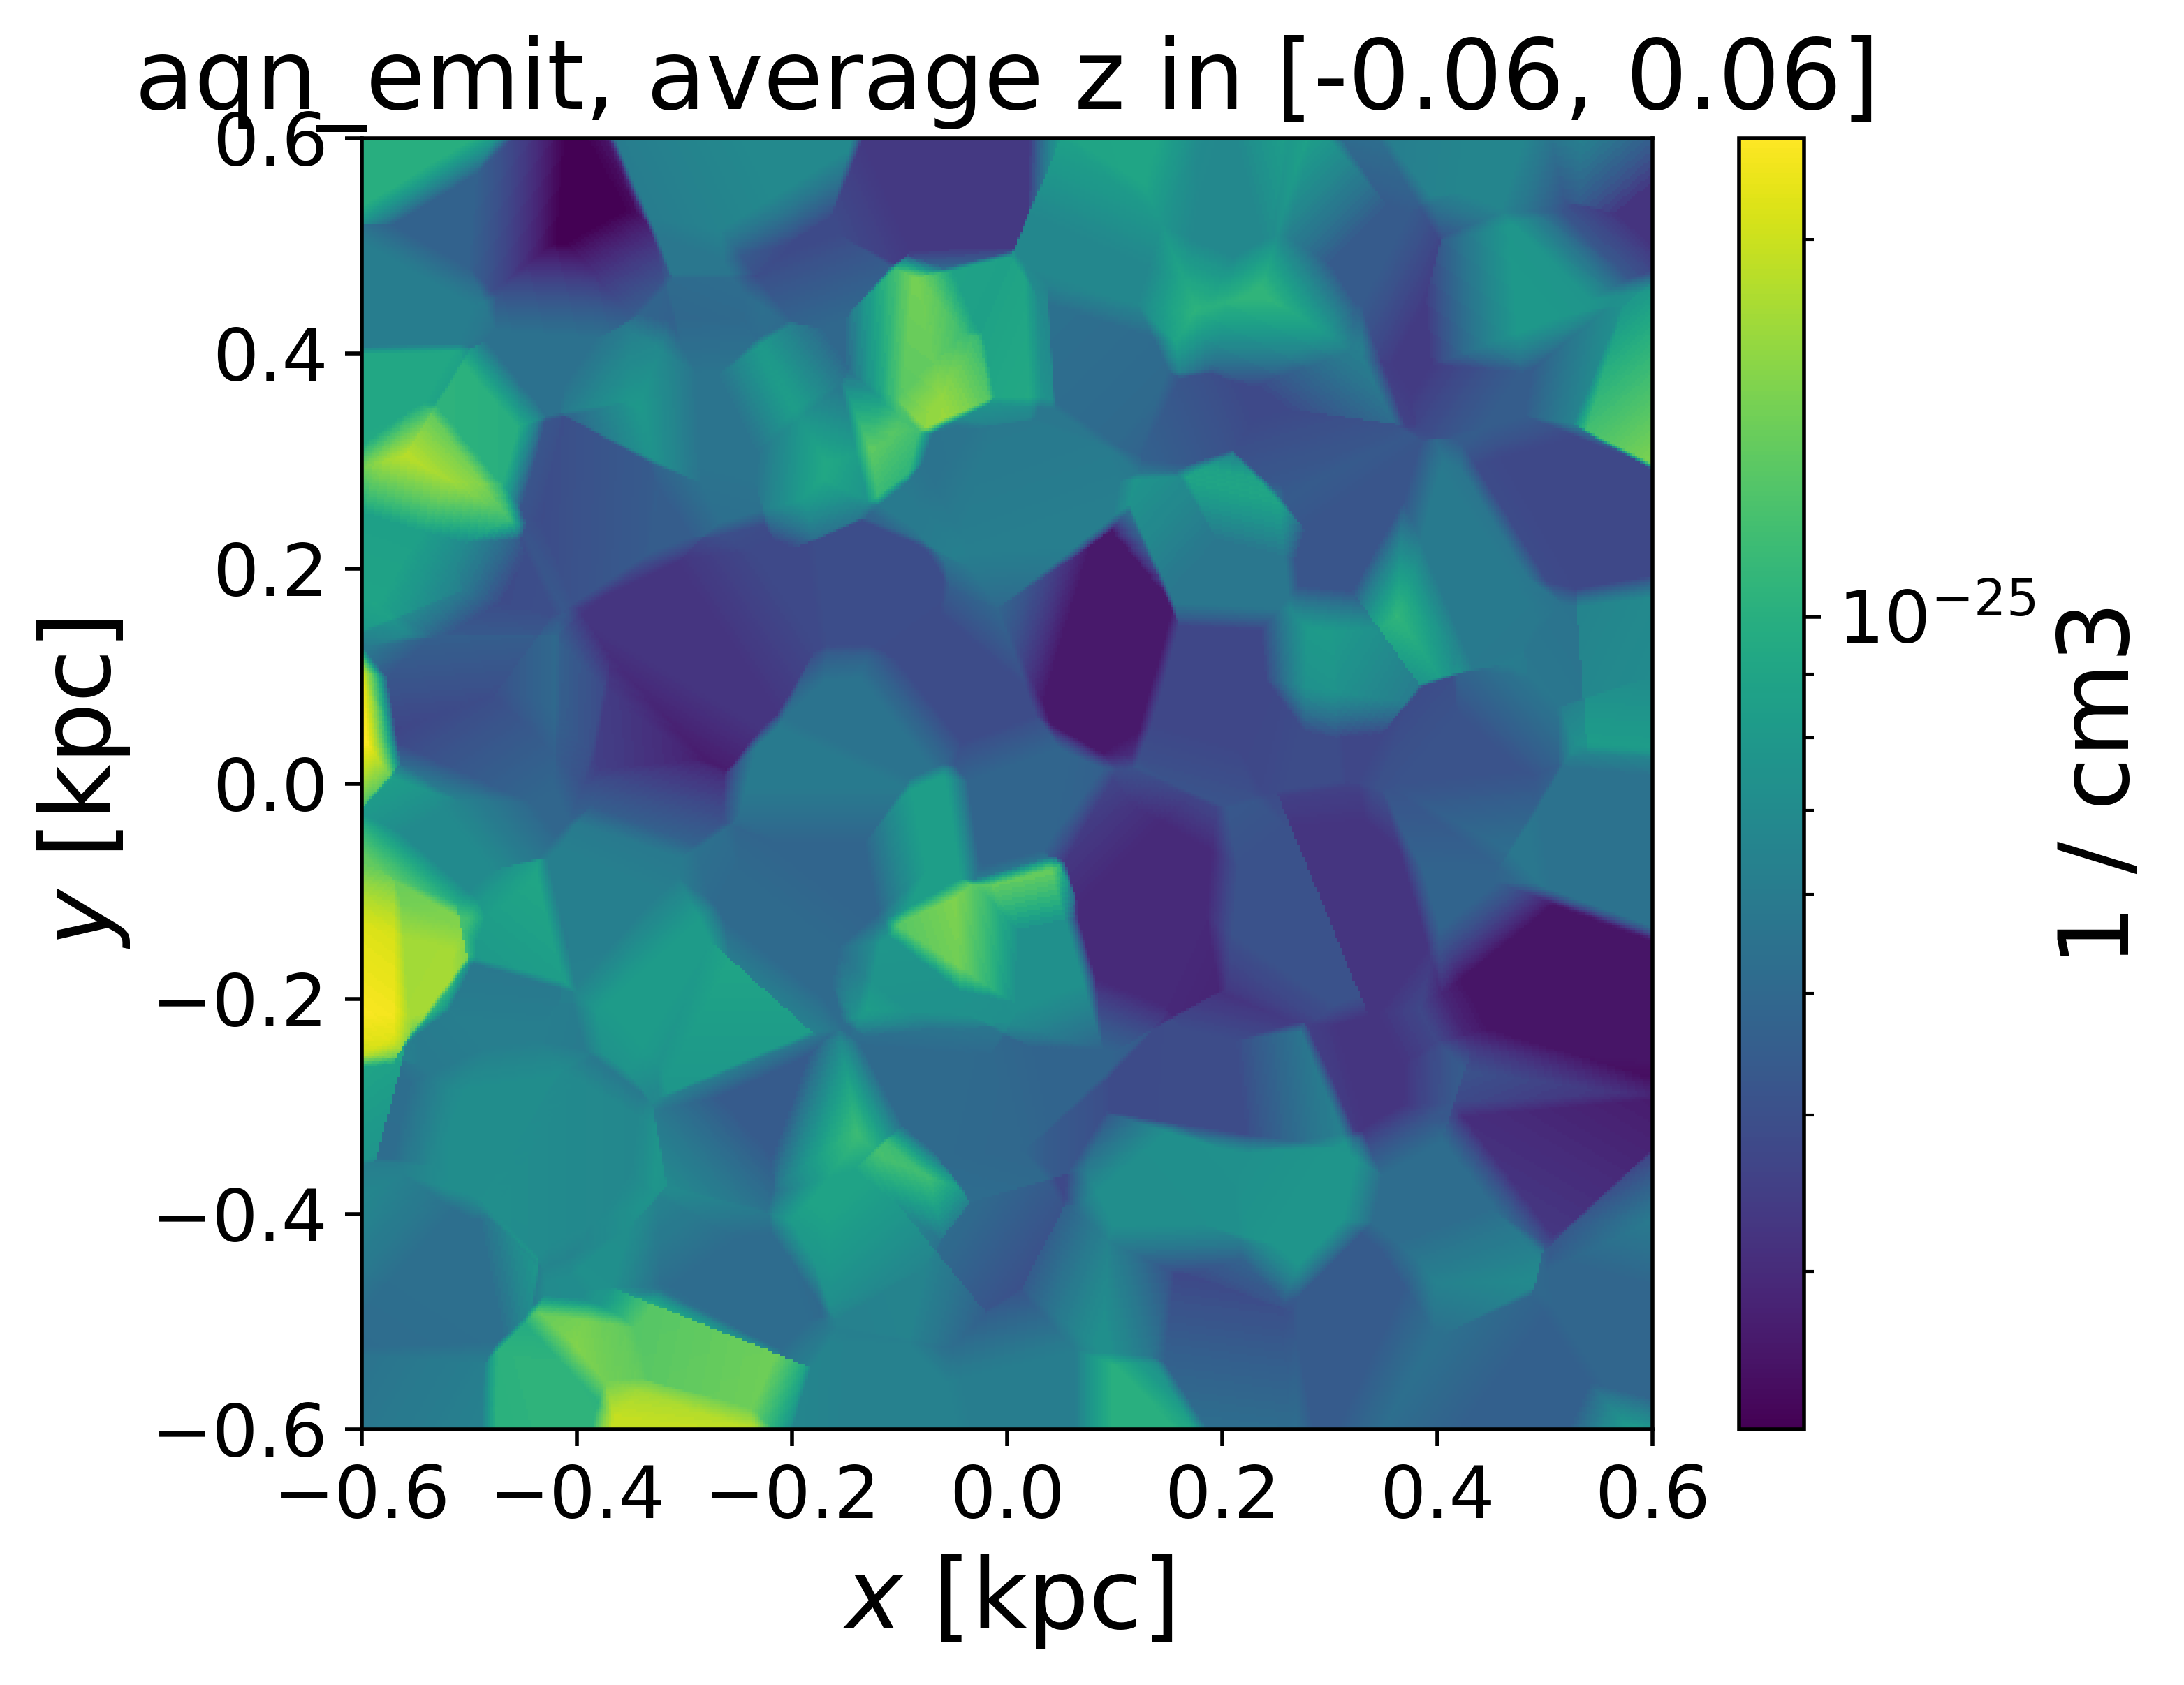

In [50]:
plot_cube(cubes["dark_mat"], cubes["dark_mat"].unit, "aqn_emit, average z in [-0.06, 0.06]")

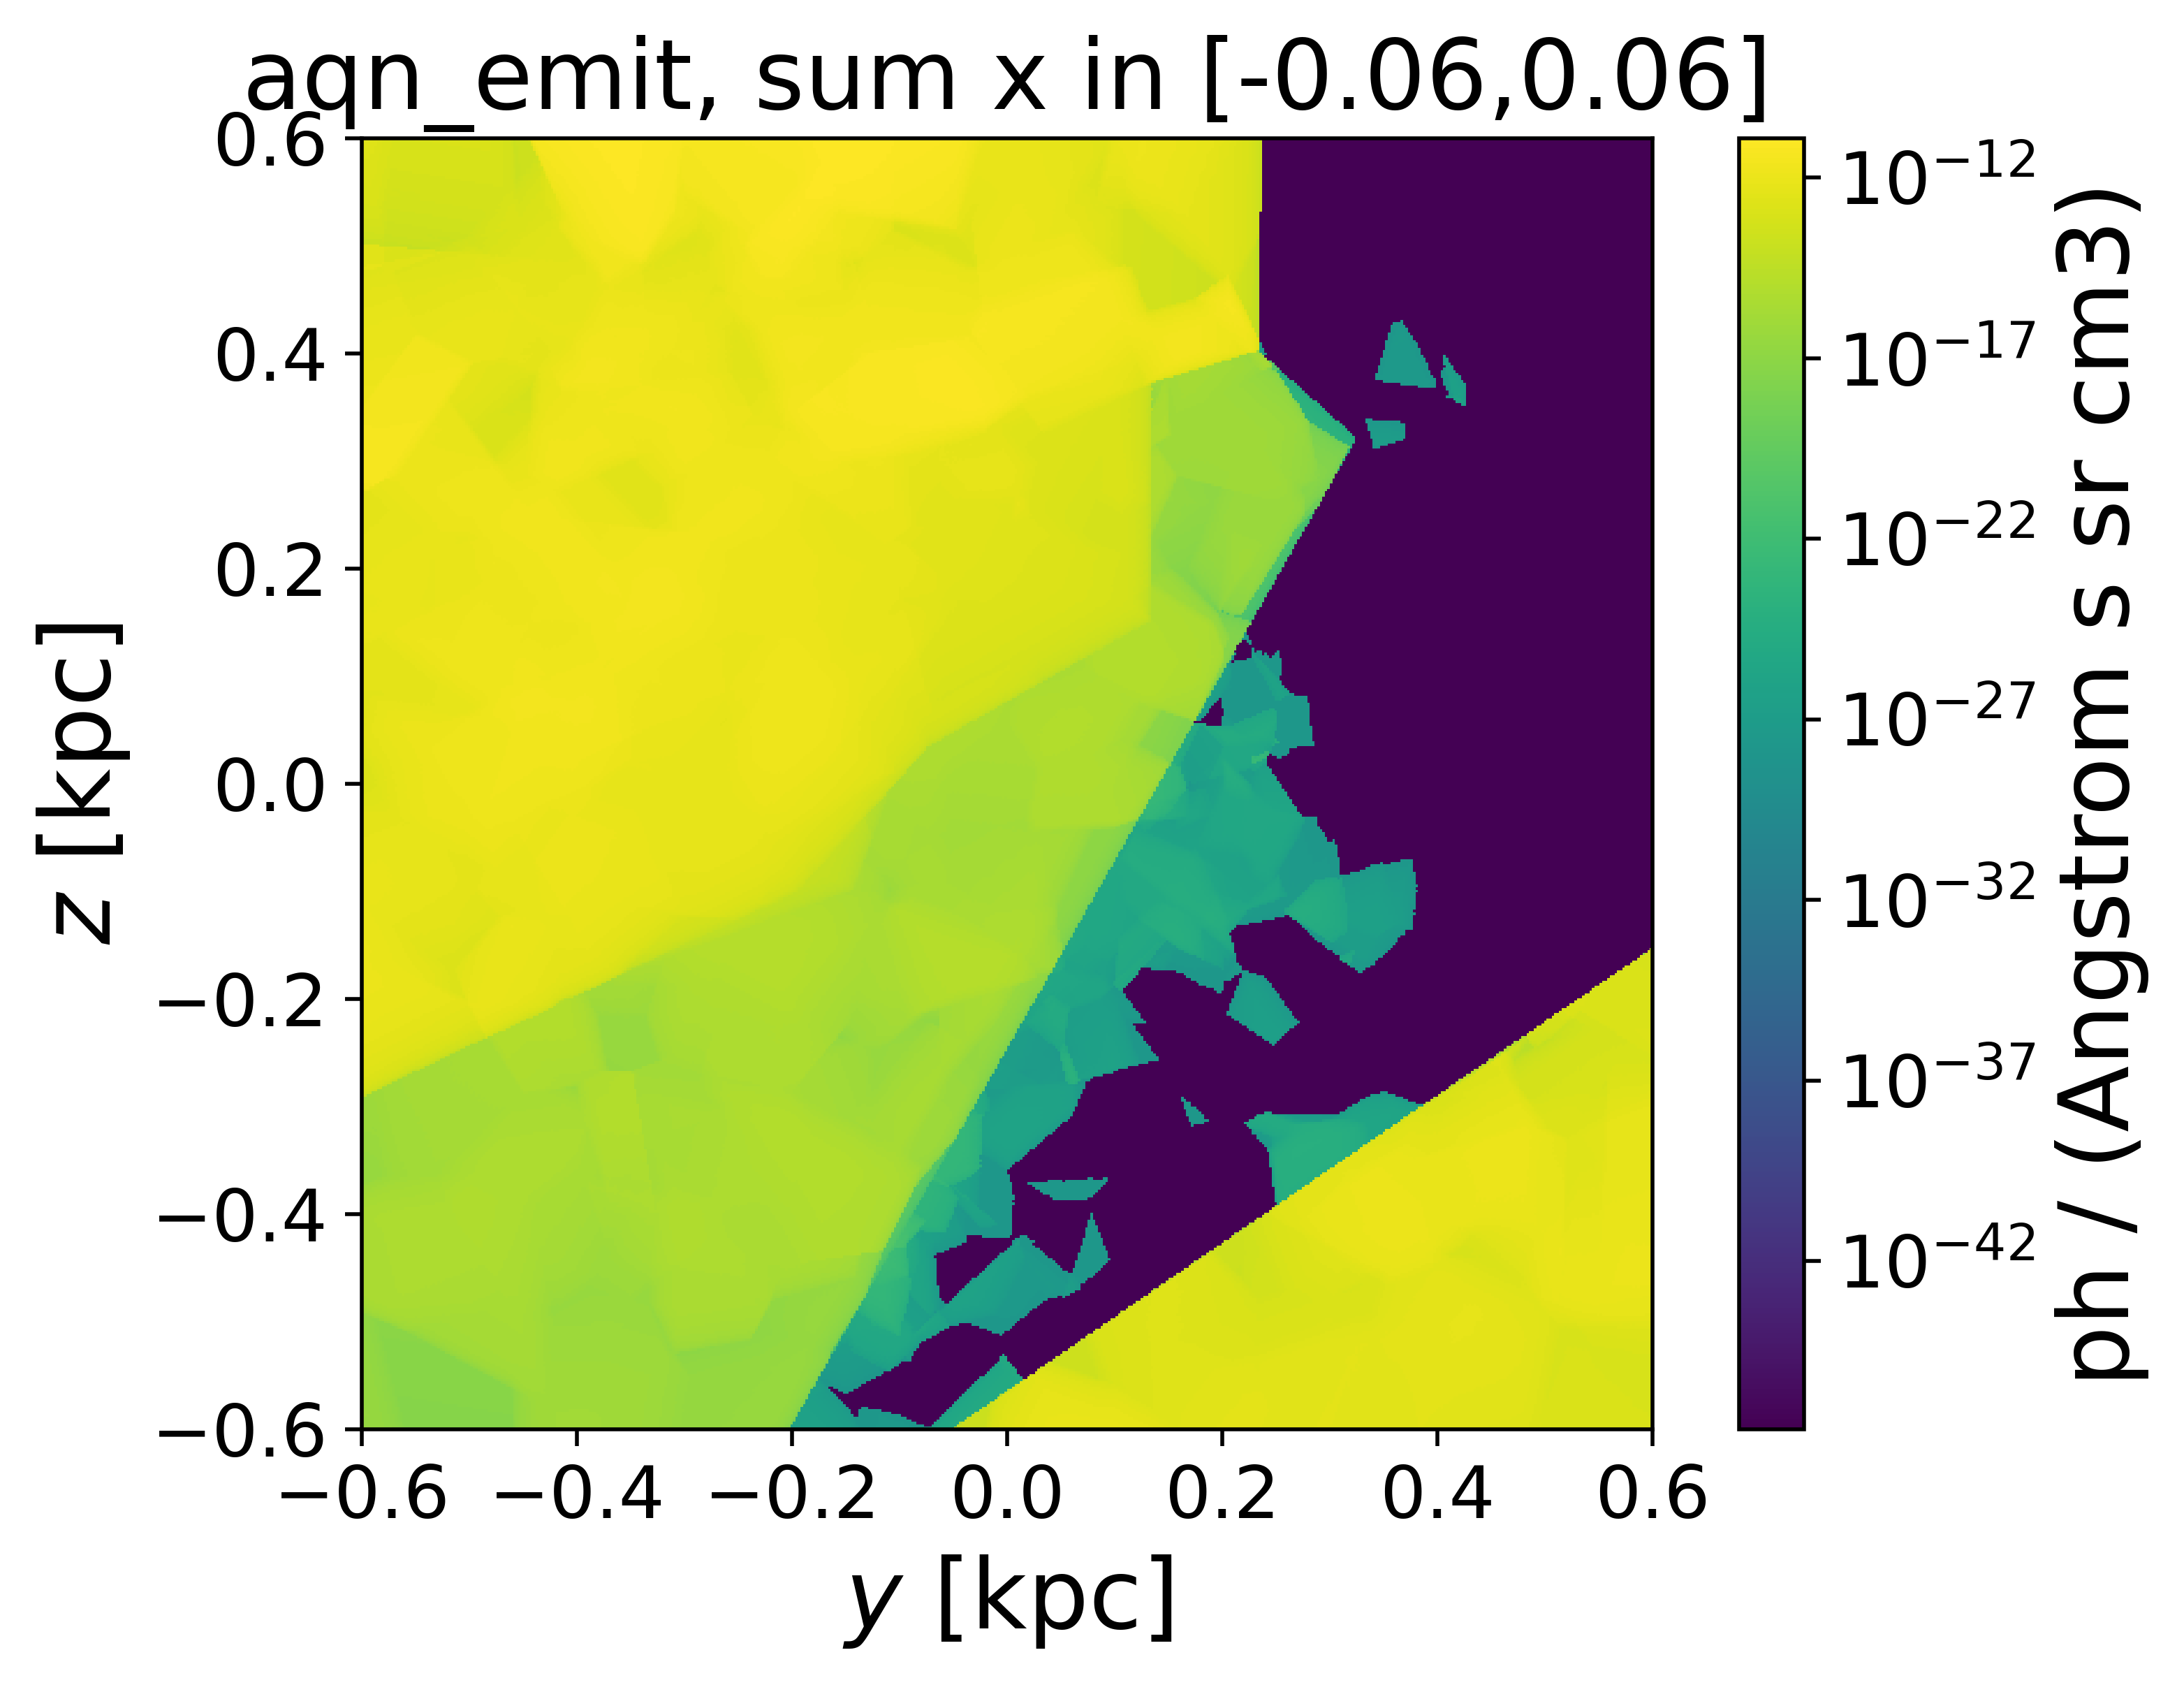

In [45]:
plot_cube_UV(cubes["aqn_emit"], cubes["aqn_emit"].unit, "aqn_emit, sum x in [-0.06,0.06]")

# Define AQN parameters

In [3]:
# define AQN parameters
m_aqn_kg = 0.2*u.kg
R_aqn_cm = calc_R_AQN(m_aqn_kg)

print("using m_aqn =", m_aqn_kg)
print("using R_aqn =", R_aqn_cm)

using m_aqn = 0.2 kg
using R_aqn = 5.147832973350967e-05 cm


# Define survey parameters

In [4]:
# specify frequency resolution and create frequency band array
# Change frequency range within survey_parameters.py
frequency_band_resolution = 1e14 # 1e9 for WMAP, 1e14 for GALEX
frequency_band = np.arange(f_min_hz.value, f_max_hz.value, frequency_band_resolution) * u.Hz

len(frequency_band)

6

# Define simulation resolution

In [5]:
sun_mw_distance_kpc = -8*u.kpc
NSIDE = 2**5
NPIX = hp.nside2npix(NSIDE)
dOmega = hp.nside2pixarea(nside=NSIDE)

# Prepare arrays for integration

In [54]:
# array of theta, phi, for each pixel
theta, phi = hp.pix2ang(nside = NSIDE, ipix = list(range(NPIX)))
dl =  0.01 * u.kpc
l_min, l_max = 0, 0.6 # np.max(distances) = 17.2867 kpc
l_list = np.arange(l_min,l_max,dl.value)[:, np.newaxis]
# 2D array of distance elements along each sightline
l = np.ones((len(l_list),len(theta))) * l_list

# (l,theta,phi) -> (x,y,z)
x = l * np.sin(-theta) * np.cos(phi) #- sun_mw_distance_kpc.value
y = l * np.sin(-theta) * np.sin(phi)
z = l * np.cos(-theta)

R = np.sqrt(x**2 + y**2 + z**2)
s = np.sqrt(x**2 + y**2) - sun_mw_distance_kpc.value
s = l * np.sin(-theta) - sun_mw_distance_kpc.value
s = -l * np.cos(phi) - sun_mw_distance_kpc.value

In [63]:
np.sqrt(z**2 + s**2)

array([[8.        , 8.        , 8.        , ..., 8.        , 8.        ,
        8.        ],
       [7.99293518, 8.00707731, 8.00707731, ..., 8.00707731, 8.00707731,
        7.99293518],
       [7.98588289, 8.01416708, 8.01416708, ..., 8.01416708, 8.01416708,
        7.98588289],
       ...,
       [7.61828883, 8.42234839, 8.42234839, ..., 8.42234839, 8.42234839,
        7.61828883],
       [7.61199252, 8.43008493, 8.43008493, ..., 8.43008493, 8.43008493,
        7.61199252],
       [7.60571071, 8.43783215, 8.43783215, ..., 8.43783215, 8.43783215,
        7.60571071]])

In [8]:
np.max(s)

8.0

In [12]:
np.degrees(phi)

array([ 45., 135., 225., ..., 135., 225., 315.])

# Compute analytical models

In [726]:
cubes = {}
cubes["dark_mat"] = (rho_dark_mat(R, [19.60758081904341, 1.081829387522867, 
                                    2.207828893849368, 1.831142772499595, 
                                    0.06711443461154958])*u.kg/u.m**3/  m_aqn_kg).to(1/u.cm**3)
cubes["ioni_gas"] = (rho_ioni_gas(R, [6.521713155920115 , 0.2940077939925656, 
                                    29.072973590609415, 1.6812716453492722, 
                                    3.9044895415071528, 3.4656473013927394, 
                                    1.43427732961435])*u.kg/u.m**3/cst.m_p.si).to(1/u.cm**3) 
cubes["neut_gas"] = (rho_neut_gas(R, [8.97656111186945  ,2.213270305404448 ,
                                    13.875013340031673,1.5018739204854163,
                                    2.58047607932149  ,1.1680782169590678,29.693878727525025])*u.kg/u.m**3/cst.m_p.si).to(1/u.cm**3)
cubes["temp_ion"] = rho_temp(R, [6.14, 0.3, 1.5, 0.1, 3.3, 0.1]) * u.K * K_to_eV
cubes["dv_ioni"]  = rho_dv_ioni(R, [0.7594266933349966, 2.73608605904013, 
                                     2.5582050186794847, 1.004084602553337, 
                                     1.6631635389592465, 17.152525652652074, 
                                     2.7163675354935055]) * u.m/u.s /cst.c
cubes["dv_neut"]  = rho_dv_neut(R, [0.7817275122369671, 1.4514477940369448, 
                                     7.670255389377027 , 
                                     2.7444837892336853]) * u.m/u.s /cst.c

# Compute using data cubes

In [212]:
# import cubes and grid_coords
grid_coords = np.load("../data/FIRE/grid-coords-uv.npy")
# grid_ids = np.load("../data/FIRE/grid-ids---dark_mat-uv.npy")

cubes = {}
cubes["dark_mat"] = np.load("../data/FIRE/cubes/cube-dark_mat_density-uv.npy") * u.kg/u.m**3
cubes["ioni_gas"] = np.load("../data/FIRE/cubes/cube-ioni_gas_density-uv.npy") * u.kg/u.m**3
cubes["neut_gas"] = np.load("../data/FIRE/cubes/cube-neut_gas_density-uv.npy") * u.kg/u.m**3
cubes["temp_ion"] = np.load("../data/FIRE/cubes/cube-ioni_gas_temp-uv.npy") * u.K
cubes["dv_ioni"]  = np.load("../data/FIRE/cubes/cube-dv_ioni-uv.npy") * u.m/u.s
cubes["dv_neut"]  = np.load("../data/FIRE/cubes/cube-dv_neut-uv.npy") * u.m/u.s

# # compute distance from every grid centre to galactic centre
distances = np.sqrt(np.sum(grid_coords**2, axis=1)) * u.kpc

In [213]:
grid_coords.shape

(134217728, 3)

In [12]:
np.max(cubes["temp_ion"])

<Quantity 1954591.09581718 K>

In [13]:
# perform some unit conversions
cubes["ioni_gas"] = (cubes["ioni_gas"]/cst.m_p.si).to(1/u.cm**3)
cubes["neut_gas"] = (cubes["neut_gas"]/cst.m_p.si).to(1/u.cm**3)
cubes["dark_mat"] = (cubes["dark_mat"]/  m_aqn_kg).to(1/u.cm**3)
cubes["temp_ion"] =  cubes["temp_ion"]*K_to_eV
cubes["dv_ioni"]  =  cubes["dv_ioni"] /cst.c
cubes["dv_neut"]  =  cubes["dv_neut"] /cst.c

In [14]:
# replace temp_ion cube with analytical calculation
# cubes["temp_ion"] = rho_temp(distances.value, [6.14, 0.3, 1.5, 0.1, 3.3, 0.1]) * u.K * K_to_eV
# cubes["temp_ion"] = np.reshape(cubes["temp_ion"], (cube_dimension, cube_dimension, cube_dimension))

In [70]:
np.shape(cubes["temp_ion"])

(512, 512, 512)

# Compute using radial averages

In [13]:
# import cubes and grid_coords
grid_coords = np.load("../data/uv-averaged-grid-coords.npy")
# grid_ids = np.load("../data/FIRE/grid-ids---dark_mat-uv.npy")

cubes = {}
cubes["dark_mat"] = np.load("../data/uv-averaged-dark_mat.npy") * u.kg/u.m**3
cubes["ioni_gas"] = np.load("../data/uv-averaged-ioni_gas.npy") * u.kg/u.m**3
cubes["neut_gas"] = np.load("../data/uv-averaged-neut_gas.npy") * u.kg/u.m**3
cubes["temp_ion"] = np.load("../data/uv-averaged-ioni_gas_temp.npy") * u.K

distances = np.sqrt(np.sum(grid_coords**2, axis=1)) * u.kpc

In [14]:
cubes["ioni_gas"] = (cubes["ioni_gas"]/cst.m_p.si).to(1/u.cm**3)
cubes["neut_gas"] = (cubes["neut_gas"]/cst.m_p.si).to(1/u.cm**3)
cubes["dark_mat"] = (cubes["dark_mat"]/  m_aqn_kg).to(1/u.cm**3)
cubes["temp_ion"] =  cubes["temp_ion"]*K_to_eV

cubes["dv_ioni"] = np.ones(np.shape(cubes["dark_mat"])) / 10
cubes["dv_neut"] = np.ones(np.shape(cubes["dark_mat"])) / 10

In [423]:
cubes["neut_gas"] = cubes["ioni_gas"].copy()

<Quantity [[4.34278378e-05, 1.31462605e-05, 4.77077416e-05,
            1.31462605e-05, 3.21912744e-05, 2.41599206e-05,
            2.62317012e-05, 1.31462605e-05, 5.23993178e-05,
            1.31462605e-05, 2.42509958e-05, 5.09159534e-05,
            3.25683659e-05, 5.68799995e-05, 4.95062414e-05,
            1.31462605e-05, 5.49055903e-05, 1.31462605e-05,
            5.26952721e-05, 1.31462605e-05, 1.31462605e-05,
            2.49242186e-05, 1.31462605e-05, 1.31462605e-05,
            2.42141273e-05, 1.31462605e-05, 1.31462605e-05,
            5.00306282e-05, 1.31462605e-05],
           [1.31462605e-05, 4.71621145e-05, 1.19201011e-04,
            2.31369248e-05, 2.30912368e-05, 1.31462605e-05,
            2.31522153e-05, 1.31462605e-05, 4.74870003e-05,
            2.94234246e-05, 2.30300666e-05, 1.31462605e-05,
            5.47256505e-05, 1.31462605e-05, 5.84035092e-05,
            2.35557129e-05, 1.31462605e-05, 2.30253749e-05,
            2.38618877e-05, 1.31462605e-05, 4.65888544e

In [16]:
cube_dimension = cubes["neut_gas"].shape[0]

In [17]:
cubes["dark_mat"] = (rho_dark_mat(distances.value, [19.60758081904341, 1.081829387522867, 
                                    2.207828893849368, 1.831142772499595, 
                                    0.06711443461154958])*u.kg/u.m**3/  m_aqn_kg).to(1/u.cm**3)
cubes["dark_mat"] = np.reshape(cubes["dark_mat"], (cube_dimension, cube_dimension))
# np.shape(cubes["temp_ion"] )

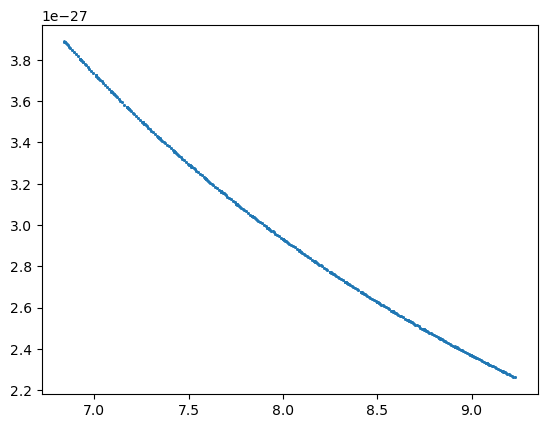

In [18]:
plt.scatter(distances.value, (rho_dark_mat(distances.value, [19.60758081904341, 1.081829387522867, 
                                    2.207828893849368, 1.831142772499595, 0.06711443461154958])*u.kg/u.m**3/  m_aqn_kg).to(1/u.cm**3), s=1)

In [426]:
cubes["dark_mat"] 

<Quantity [[3.75740455e-27, 3.67930427e-27, 3.60364780e-27,
            3.53033444e-27, 3.45926855e-27, 3.39035930e-27,
            3.32352038e-27, 3.25866968e-27, 3.19572914e-27,
            3.13462444e-27, 3.07528483e-27, 3.01764290e-27,
            2.96163442e-27, 2.90719816e-27, 2.85427572e-27,
            2.80281134e-27, 2.75275185e-27, 2.70404641e-27,
            2.65664651e-27, 2.61050574e-27, 2.56557974e-27,
            2.52182610e-27, 2.47920421e-27, 2.43767523e-27,
            2.39720194e-27, 2.35774871e-27, 2.31928137e-27,
            2.28176721e-27, 2.24517481e-27],
           [3.76985202e-27, 3.69121607e-27, 3.61505243e-27,
            3.54125859e-27, 3.46973728e-27, 3.40039610e-27,
            3.33314730e-27, 3.26790746e-27, 3.20459725e-27,
            3.14314121e-27, 3.08346750e-27, 3.02550772e-27,
            2.96919670e-27, 2.91447234e-27, 2.86127540e-27,
            2.80954938e-27, 2.75924038e-27, 2.71029691e-27,
            2.66266981e-27, 2.61631209e-27, 2.57117886e

# Calculate spectral spatial emissivity

In [19]:
# compute T_AQN
cubes["t_aqn_n"] = T_AQN_analytical(cubes["neut_gas"], cubes["dv_neut"], f, g)
cubes["t_aqn_i"] = T_AQN_ionized2(cubes["ioni_gas"], cubes["dv_ioni"], f, g, cubes["temp_ion"], R_aqn_cm)
# if ioni temp is lower than neut temp, replace with neut temp
cubes["t_aqn_i"][cubes["t_aqn_i"]<cubes["t_aqn_n"]] = cubes["t_aqn_n"][cubes["t_aqn_i"]<cubes["t_aqn_n"]]

In [20]:
# from erg/s/Hz/cm2 to photons/s/A/cm2
skymap_units =  1*u.photon / u.cm**2 / u.s / u.Angstrom
def convert_to_skymap_units(F_erg_hz_cm2,nu):
    erg_hz_cm2 = 1*u.erg/u.s/u.Hz/u.cm**2
    w = nu.to(u.AA, equivalencies=u.spectral())
    C = (erg_hz_cm2).to(skymap_units, u.spectral_density(w))
    #                                                                      ^^^^^^^ this comes from using hbar instead of h in the conversion.
    return F_erg_hz_cm2 * C / erg_hz_cm2 * 2*np.pi

In [265]:
# from erg/s/Hz/cm2 to mK
skymap_units = u.Jy
def convert_to_skymap_units(F_erg_hz_cm2,nu):
    erg_hz_cm2 = 1*u.erg/u.s/u.Hz/u.cm**2
    C = erg_hz_cm2.to(skymap_units)
    return (F_erg_hz_cm2 * C / erg_hz_cm2).to(u.mK, equivalencies = u.brightness_temperature(nu))

In [21]:
cubes["aqn_emit"] = np.zeros(np.shape(cubes["t_aqn_n"])) *  u.photon / u.cm**2 / u.s / u.Angstrom / u.sr # u.mK # (u.erg/(u.Hz*u.s*u.cm**2)) # photons/s/A/cm2

for nu in frequency_band[0:1]:
    cubes["aqn_emit"] += convert_to_skymap_units(spectral_surface_emissivity(nu, cubes["t_aqn_n"])/(dOmega*u.sr), nu) + \
                         convert_to_skymap_units(spectral_surface_emissivity(nu, cubes["t_aqn_i"])/(dOmega*u.sr), nu)
    # cubes["aqn_emit"] += spectral_surface_emissivity(nu, cubes["t_aqn_n"]) + \
    #                      spectral_surface_emissivity(nu, cubes["t_aqn_i"])
cubes["aqn_emit"] = cubes["aqn_emit"] * 4 * np.pi * R_aqn_cm**2 * cubes["dark_mat"]

# np.save("../data/FIRE/cubes/cube-aqn_emit.npy", cubes["aqn_emit"].value)

In [1]:
# plot_cube(cubes["temp_ion"], "eV", "temp_ion")
# np.max(cubes["temp_ion"])/K_to_eV

In [2]:
# plot_cube(cubes["t_aqn"], "eV", "temp_ion")


In [3]:
# plot_cube(cubes["t_aqn_i"], "eV", "aqn_emit")

In [4]:
# plot_cube(cubes["neut_gas"], " ", "neut_gas")

In [236]:
# plot_cube(cubes["aqn_emit"], "mK/cm", "Spatial Emissivity")

In [235]:
# plot_cube(cubes["dark_mat"], "1/cm^3", "T_AQN")

In [333]:
T_warm     = (3e4 + 1e5)/2 * u.K * K_to_eV
T_warm_hot = (1e5 + 1e6)/2 * u.K * K_to_eV
T_hot      = 1e6 * u.K * K_to_eV
print(T_hot)

86.17333262145178 eV


# Integrate using analytical models

In [244]:
f_aqn = np.sum(cubes["aqn_emit"], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

In [36]:
f_aqn = np.sum(analy["aqn_emit"], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

NameError: name 'analy' is not defined

# Integrate using data cubes

In [356]:
from scipy.spatial import cKDTree
print(f">> generating cKDTree")
tree_points = cKDTree(grid_coords)

>> generating cKDTree


In [357]:
cube_indexes = np.zeros(np.shape(x))
# for each radius element
for i in range(np.shape(x)[0]):
    # find the nearest cube for all angles
    cube_indexes[i,:] = tree_points.query(np.array([x[i,:],y[i,:],z[i,:]]).T)[1]
    print((i+1)/np.shape(x)[0] * 100, end="\r")

cube_indexes = np.array(np.round(cube_indexes), dtype = np.int32)

ValueError: x must consist of vectors of length 2 but has shape (12288, 3)

In [175]:
cube_dimension = np.shape(cubes["aqn_emit"])[0]
flat_aqn_emit  = np.reshape(cubes["aqn_emit"],(cube_dimension**3))
f_aqn = np.sum(flat_aqn_emit[cube_indexes], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

ValueError: cannot reshape array of size 841 into shape (24389,)

In [29]:
f_aqn

<Quantity [1.21901881e-14, 1.21901881e-14, 1.21901795e-14, ...,
           1.14707140e+03, 1.10524064e+03, 9.54066696e+02] ph / (Angstrom s sr cm2)>

# Integrate using radial averages

In [55]:
from scipy.spatial import cKDTree
print(f">> generating cKDTree")
grid_coords = np.load("../data/uv-averaged-grid-coords.npy")
# grid_coords[:,0] = grid_coords[:,0] - 8
tree_points = cKDTree(grid_coords)


>> generating cKDTree


In [56]:
cube_indexes = np.zeros(np.shape(x))
# for each radius element
for i in range(np.shape(x)[0]):
    # find the nearest cube for all angles
    cube_indexes[i,:] = tree_points.query(np.array([s[i,:],z[i,:]]).T)[1]
    print((i+1)/np.shape(x)[0] * 100, end="\r")

cube_indexes = np.array(np.round(cube_indexes), dtype = np.int32)

In [57]:
cube_dimension = np.shape(cubes["aqn_emit"])[0]
flat_aqn_emit  = np.reshape(cubes["aqn_emit"],(cube_dimension**2))
f_aqn = np.sum(flat_aqn_emit[cube_indexes], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

In [25]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)
signal = flat_aqn_emit.copy()
signal[cube_indexes[:,centre_index]] = 1 * signal.unit
signal = np.reshape(signal,(cube_dimension, cube_dimension))
# plt.imshow(signal.value)

In [890]:
plt.close()

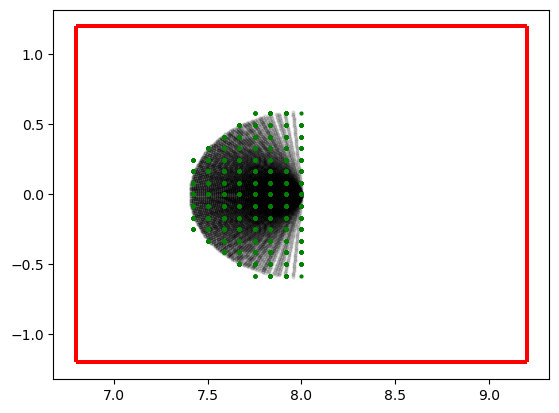

In [26]:
for i in np.arange(20,theta.shape[0], 50):
    t, p = theta[i], phi[i]
    centre_index = hp.ang2pix(NSIDE, theta=t, phi=p)
    plt.scatter(s[:,centre_index], z[:,centre_index], s=4, color="black", alpha=0.1)
    plt.scatter(grid_coords[cube_indexes[:,centre_index]][:,0], grid_coords[cube_indexes[:,centre_index]][:,1], s=4, color="green")
    plt.hlines([-1.2,1.2], [6.8, 6.8], [9.2,9.2], colors="red")
    plt.vlines([6.8,9.2], [-1.2, -1.2], [1.2,1.2], colors="red")
plt.show()

In [769]:
theta[centre_index]

1.633337088591388

In [770]:
phi[centre_index]

4.71238898038469

In [778]:
y[:,centre_index]

array([0.        , 0.00998045, 0.0199609 , 0.02994135, 0.0399218 ,
       0.04990225, 0.0598827 , 0.06986315, 0.0798436 , 0.08982405,
       0.0998045 , 0.10978495, 0.1197654 , 0.12974585, 0.13972629,
       0.14970674, 0.15968719, 0.16966764, 0.17964809, 0.18962854,
       0.19960899, 0.20958944, 0.21956989, 0.22955034, 0.23953079,
       0.24951124, 0.25949169, 0.26947214, 0.27945259, 0.28943304,
       0.29941349, 0.30939394, 0.31937439, 0.32935484, 0.33933529,
       0.34931574, 0.35929619, 0.36927664, 0.37925709, 0.38923754,
       0.39921799, 0.40919844, 0.41917888, 0.42915933, 0.43913978,
       0.44912023, 0.45910068, 0.46908113, 0.47906158, 0.48904203,
       0.49902248, 0.50900293, 0.51898338, 0.52896383, 0.53894428,
       0.54892473, 0.55890518, 0.56888563, 0.57886608, 0.58884653])

In [804]:
plt.close()

In [62]:
grid_coords[cube_indexes[:,centre_index]][:,0].shape

(60,)

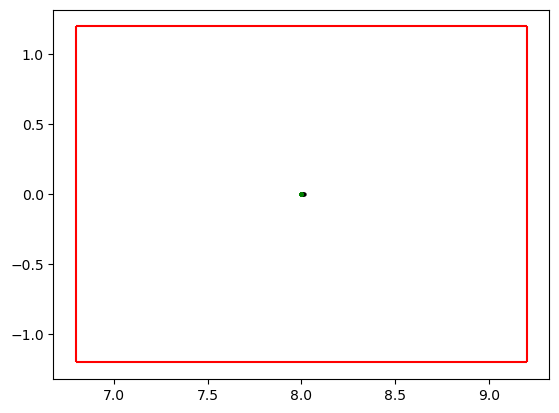

In [60]:
centre_index = hp.ang2pix(NSIDE, np.pi/2, np.pi/2, lonlat=False)
plt.close()
plt.scatter(s[:,centre_index], z[:,centre_index], s=4, color="black", alpha=0.1)
plt.scatter(grid_coords[cube_indexes[:,centre_index]][:,0], grid_coords[cube_indexes[:,centre_index]][:,1], s=4, color="green")
plt.hlines([-1.2,1.2], [6.8, 6.8], [9.2,9.2], colors="red")
plt.vlines([6.8,9.2], [-1.2, -1.2], [1.2,1.2], colors="red")
plt.show()


In [820]:
centre_index = hp.ang2pix(NSIDE, -90, -2.71, lonlat=True)
centre_index = hp.ang2pix(NSIDE, -25, 36, lonlat=True)

12216


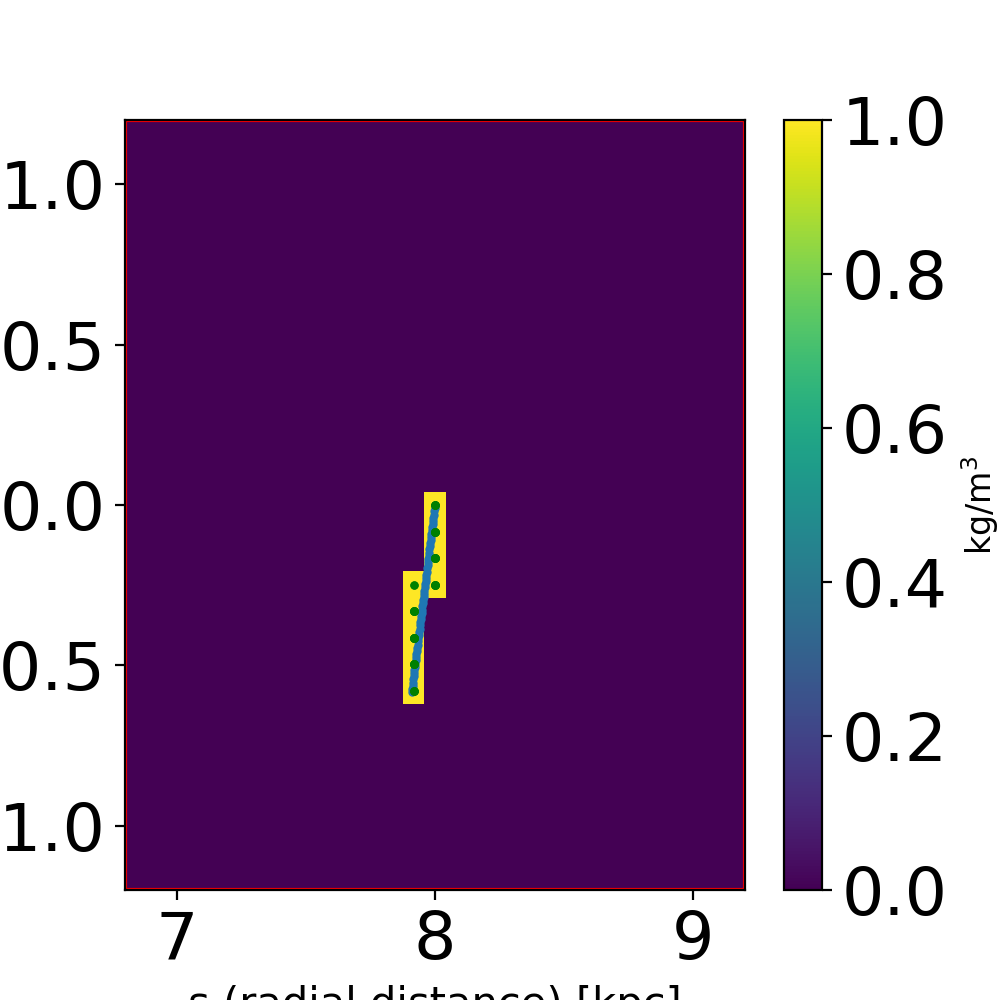

In [886]:
import matplotlib.colors as mcolors
# fig, axs = plt.subplots(1, 1, dpi=200, sharex = True, sharey = True, figsize=(5,5))


fig, axs = plt.subplots(1, 1, dpi=200, sharex = True, sharey = True, figsize=(5,5))

centre_index = hp.ang2pix(NSIDE, theta=3, phi=np.pi)
# centre_index = hp.ang2pix(NSIDE, -30, 36, lonlat=True)
print(centre_index)
signal = flat_aqn_emit.copy()
signal[cube_indexes[:,centre_index]] = 1 * signal.unit
signal = np.reshape(signal,(cube_dimension, cube_dimension))

axs.set_xlabel("s (radial distance) [kpc]",size=15)
axs.set_ylabel("z [kpc]",size=15)

bins_s = np.linspace(6.8,9.2,30)
bins_z = np.linspace(-1.2,1.2,30)

bin_centers_s = (bins_s[1:] + bins_s[:-1])/2
bin_centers_z = (bins_z[1:] + bins_z[:-1])/2

S, Z = np.meshgrid(bins_s, bins_z)

bin_centers_s, bin_centers_z = np.meshgrid(bin_centers_s, bin_centers_z)

norm = mcolors.LogNorm(vmin=np.min(signal.value), vmax=signal.value.max())
c = axs.pcolormesh(S, Z, (signal.value))



axs.scatter(s[:,centre_index], z[:,centre_index], s=4)
axs.scatter(grid_coords[cube_indexes[:,centre_index]][:,0], grid_coords[cube_indexes[:,centre_index]][:,1], s=4, color="green")

axs.hlines([-1.2,1.2], [6.8, 6.8], [9.2,9.2], colors="red")
axs.vlines([6.8,9.2], [-1.2, -1.2], [1.2,1.2], colors="red")
cbar = fig.colorbar(c, ax=axs)
cbar.set_label(r'kg/m$^3$', size=12)

plt.show()

In [760]:
S[:,centre_index]

IndexError: index 6560 is out of bounds for axis 1 with size 30

In [49]:
centre_index = hp.ang2pix(NSIDE, np.pi/2, 2*np.pi)

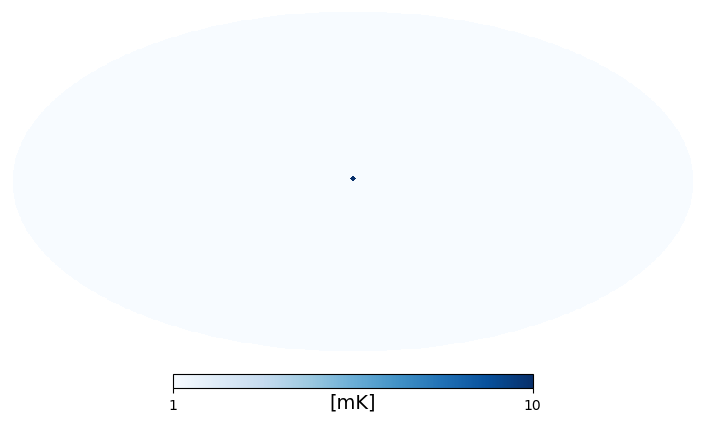

In [50]:
tester = np.zeros_like(f_aqn)
tester += 1 * tester.unit
tester[centre_index] = 10 * tester.unit

f1 = plt.figure(figsize=(7.5,4.5), dpi=100)
hp.mollview(tester, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", #min=0.1, max=0.27
            min = np.min(tester).value, 
            max = np.max(tester).value
            #min=-0.02,
            #max=270
           )


In [564]:
# plt.pcolormesh(s, z, signal.T)

In [559]:
z[:,centre_index]

array([-0.        , -0.00999674, -0.01999349, -0.02999023, -0.03998698,
       -0.04998372, -0.05998047, -0.06997721, -0.07997396, -0.0899707 ,
       -0.09996745, -0.10996419, -0.11996094, -0.12995768, -0.13995443,
       -0.14995117, -0.15994792, -0.16994466, -0.17994141, -0.18993815,
       -0.1999349 , -0.20993164, -0.21992839, -0.22992513, -0.23992187,
       -0.24991862, -0.25991536, -0.26991211, -0.27990885, -0.2899056 ,
       -0.29990234, -0.30989909, -0.31989583, -0.32989258, -0.33988932,
       -0.34988607, -0.35988281, -0.36987956, -0.3798763 , -0.38987305,
       -0.39986979, -0.40986654, -0.41986328, -0.42986003, -0.43985677,
       -0.44985352, -0.45985026, -0.46984701, -0.47984375, -0.48984049,
       -0.49983724, -0.50983398, -0.51983073, -0.52982747, -0.53982422,
       -0.54982096, -0.55981771, -0.56981445, -0.5798112 , -0.58980794])

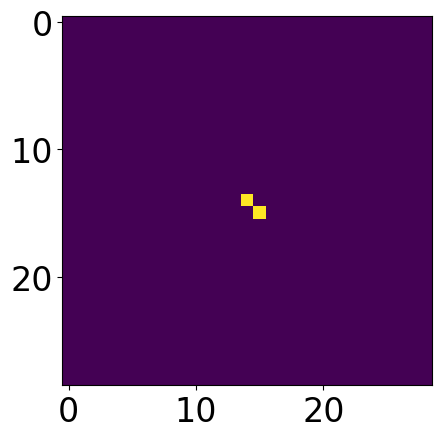

In [482]:
np.reshape(signal,(cube_dimension, cube_dimension))

<Quantity [[2.29468673e-14, 1.46341544e-14, 4.35185558e-15,
            1.40416381e-14, 1.03495162e-14, 2.88264680e-58,
            3.66943423e-39, 1.29611121e-14, 7.49216644e-55,
            1.24677316e-14, 1.46169576e-33, 8.67238137e-37,
            8.52200221e-16, 3.13356307e-14, 4.27710804e-25,
            1.11479701e-14, 1.20515845e-32, 1.07551400e-14,
            6.36106298e-15, 1.03830891e-14, 1.02043993e-14,
            3.86007465e-63, 9.86084720e-15, 9.69566881e-15,
            2.48704927e-15, 9.37776711e-15, 9.22476620e-15,
            8.35599979e-37, 8.93001297e-15],
           [1.49943012e-14, 3.83533917e-23, 4.82109168e-14,
            5.09197626e-16, 1.48705128e-47, 1.35248182e-14,
            2.75771171e-38, 1.29978547e-14, 8.23231327e-35,
            3.20697181e-14, 9.20234263e-40, 1.20337281e-14,
            1.97267435e-24, 1.15920932e-14, 6.50501983e-23,
            1.78096512e-63, 1.09746699e-14, 6.55029536e-30,
            1.55358598e-14, 1.04061834e-14, 6.64980784e

In [481]:
29*29

841

In [475]:
np.max(signal)

<Quantity 9.42199024e-14 ph / (Angstrom s sr cm3)>

In [450]:
cube_indexes.shape

(60, 12288)

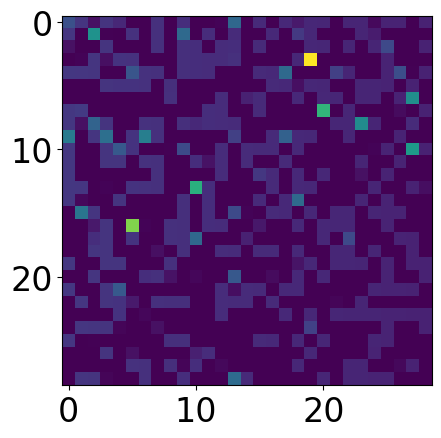

In [449]:
plt.imshow(cubes["aqn_emit"].value)

# Plot skymap of results

(array([4352.,  384.,  256.,  256., 1232., 1160., 1128., 1660.,  828.,
        1032.]),
 array([5.51501104e-11, 7.92586421e+01, 1.58517284e+02, 2.37775926e+02,
        3.17034569e+02, 3.96293211e+02, 4.75551853e+02, 5.54810495e+02,
        6.34069137e+02, 7.13327779e+02, 7.92586421e+02]),
 <BarContainer object of 10 artists>)

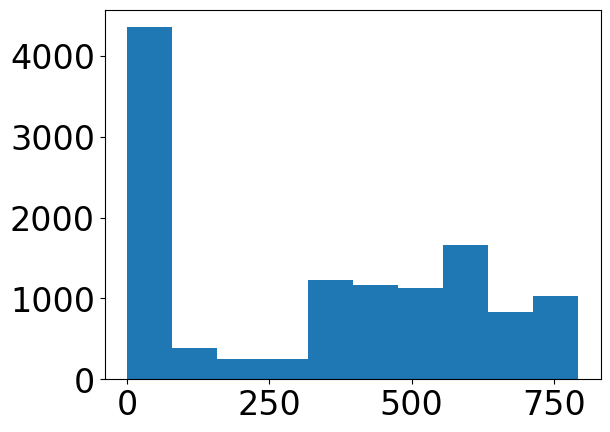

In [433]:
plt.hist(f_aqn)

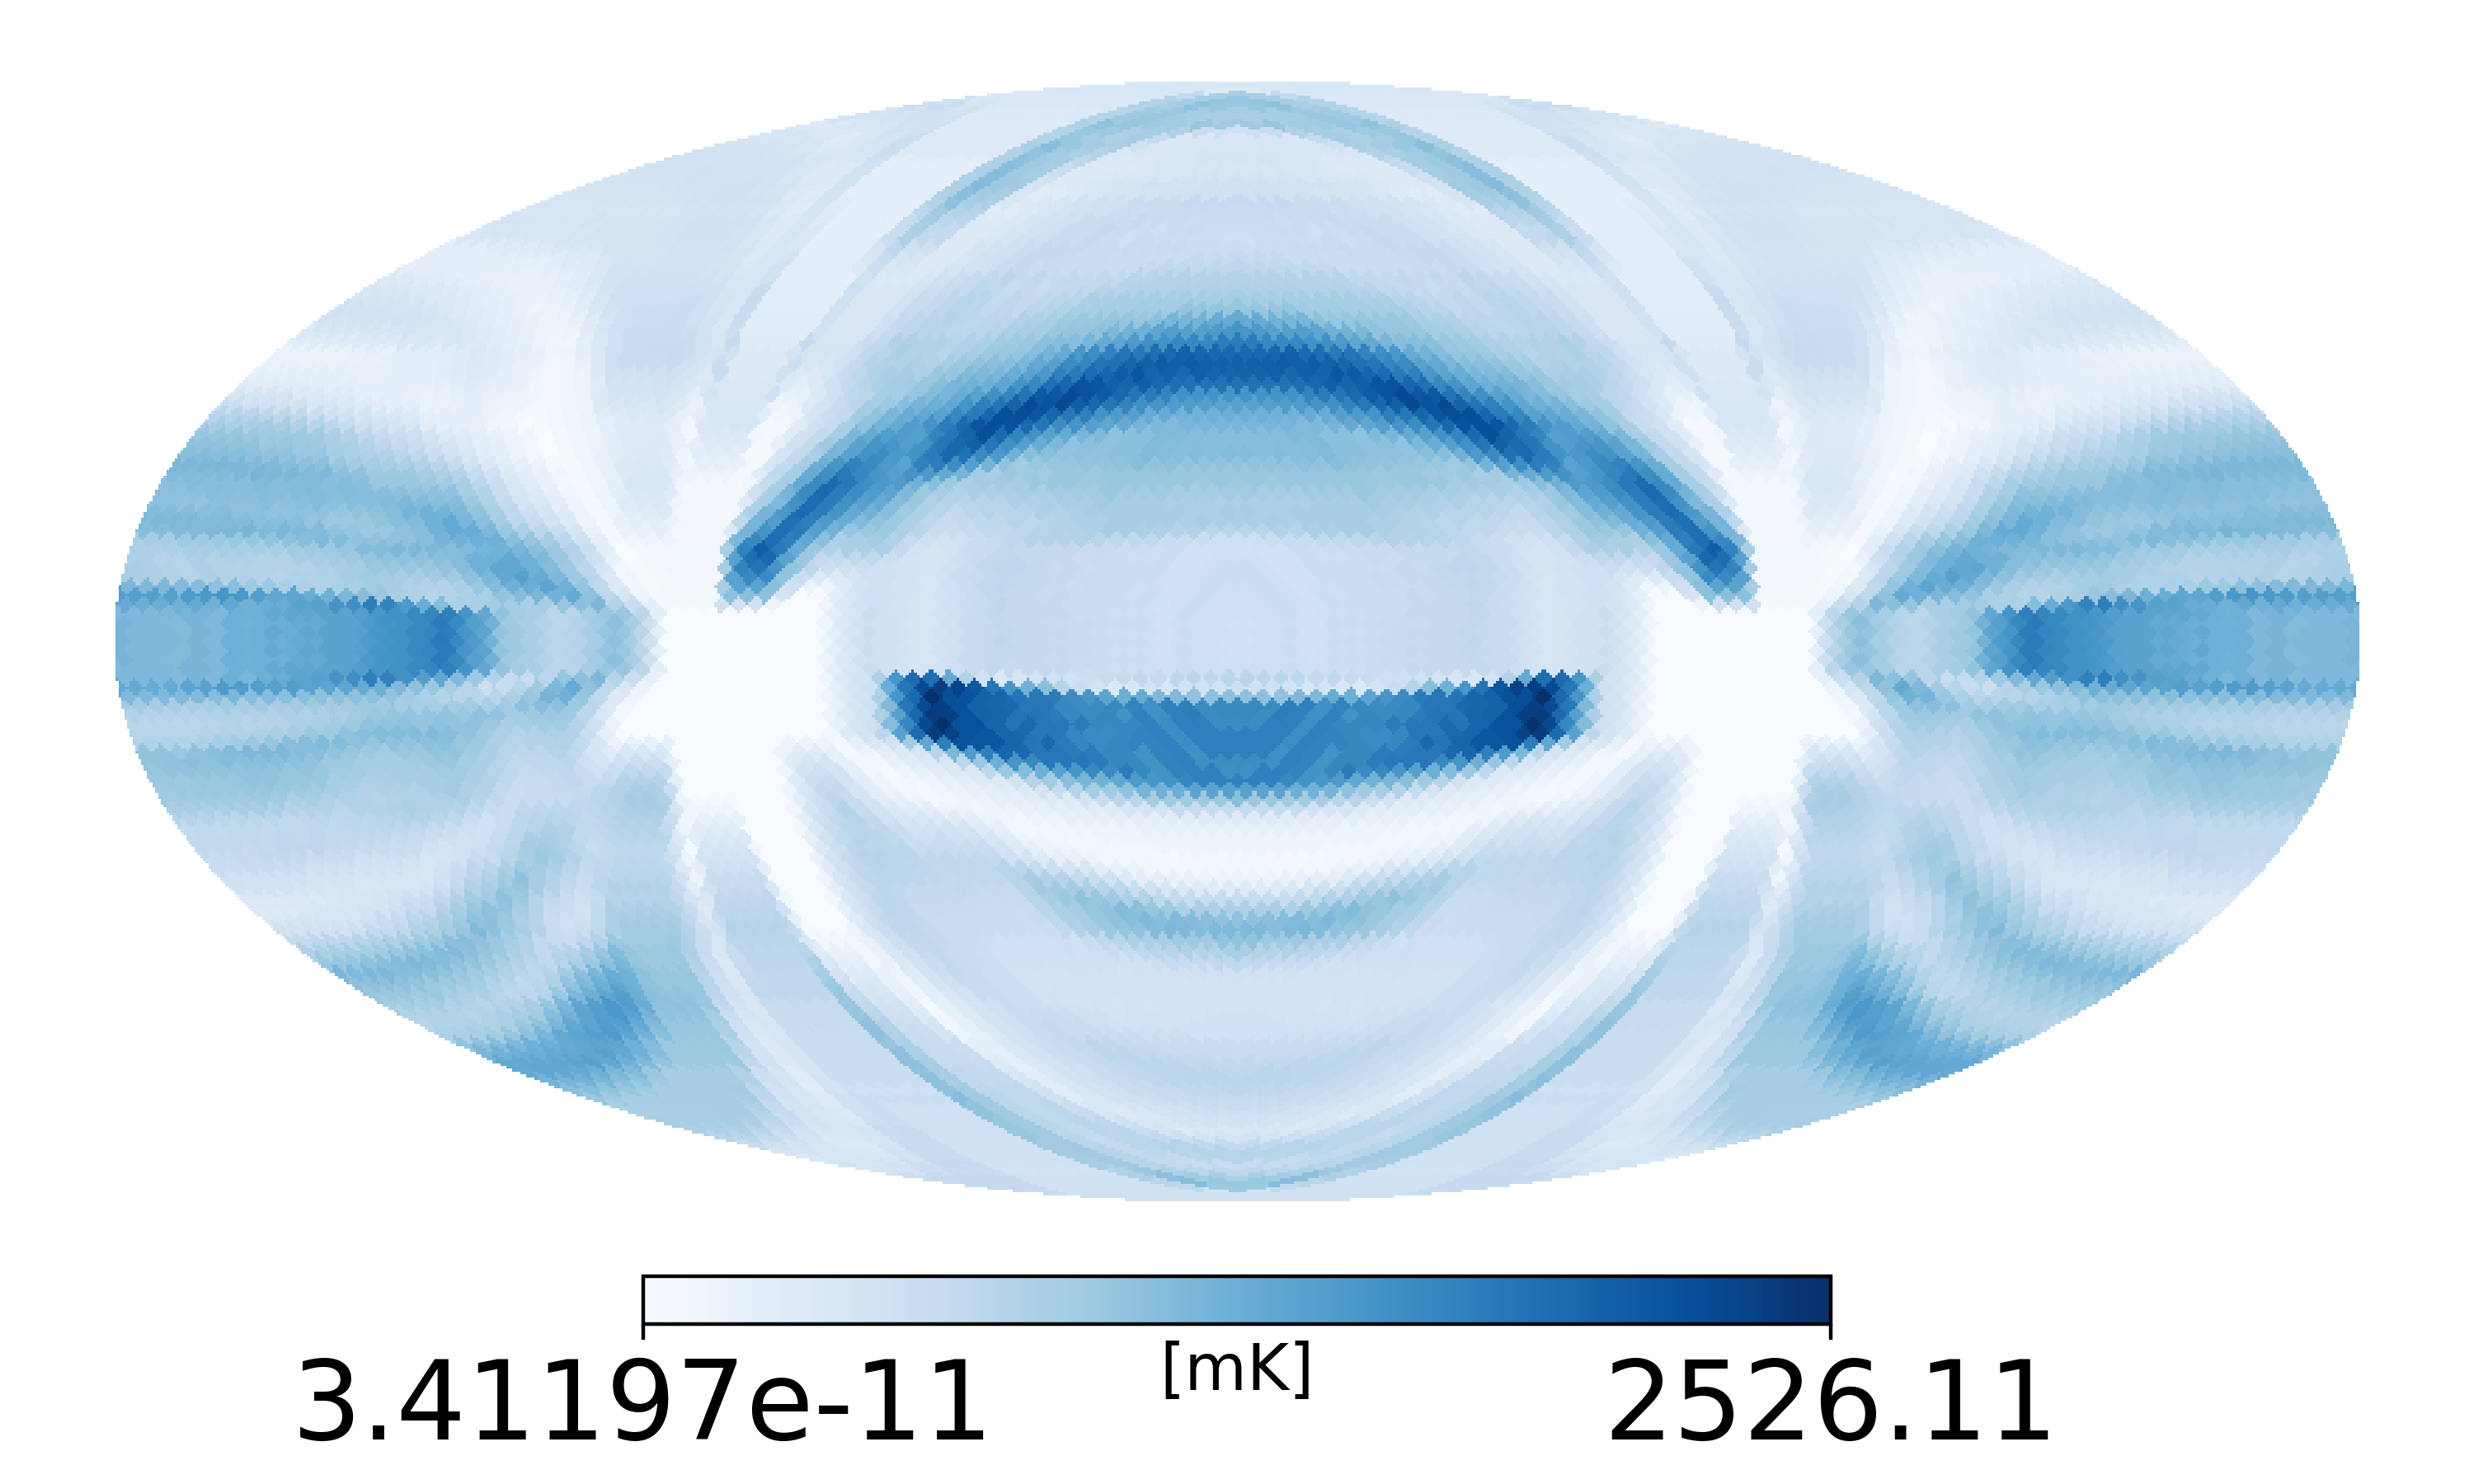

In [758]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(f_aqn, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", #min=0.1, max=0.27
            min = np.min(f_aqn).value, 
            max = np.max(f_aqn).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
# plt.savefig("../visuals/numerical-skymap"+".svg", bbox_inches='tight')
plt.show()

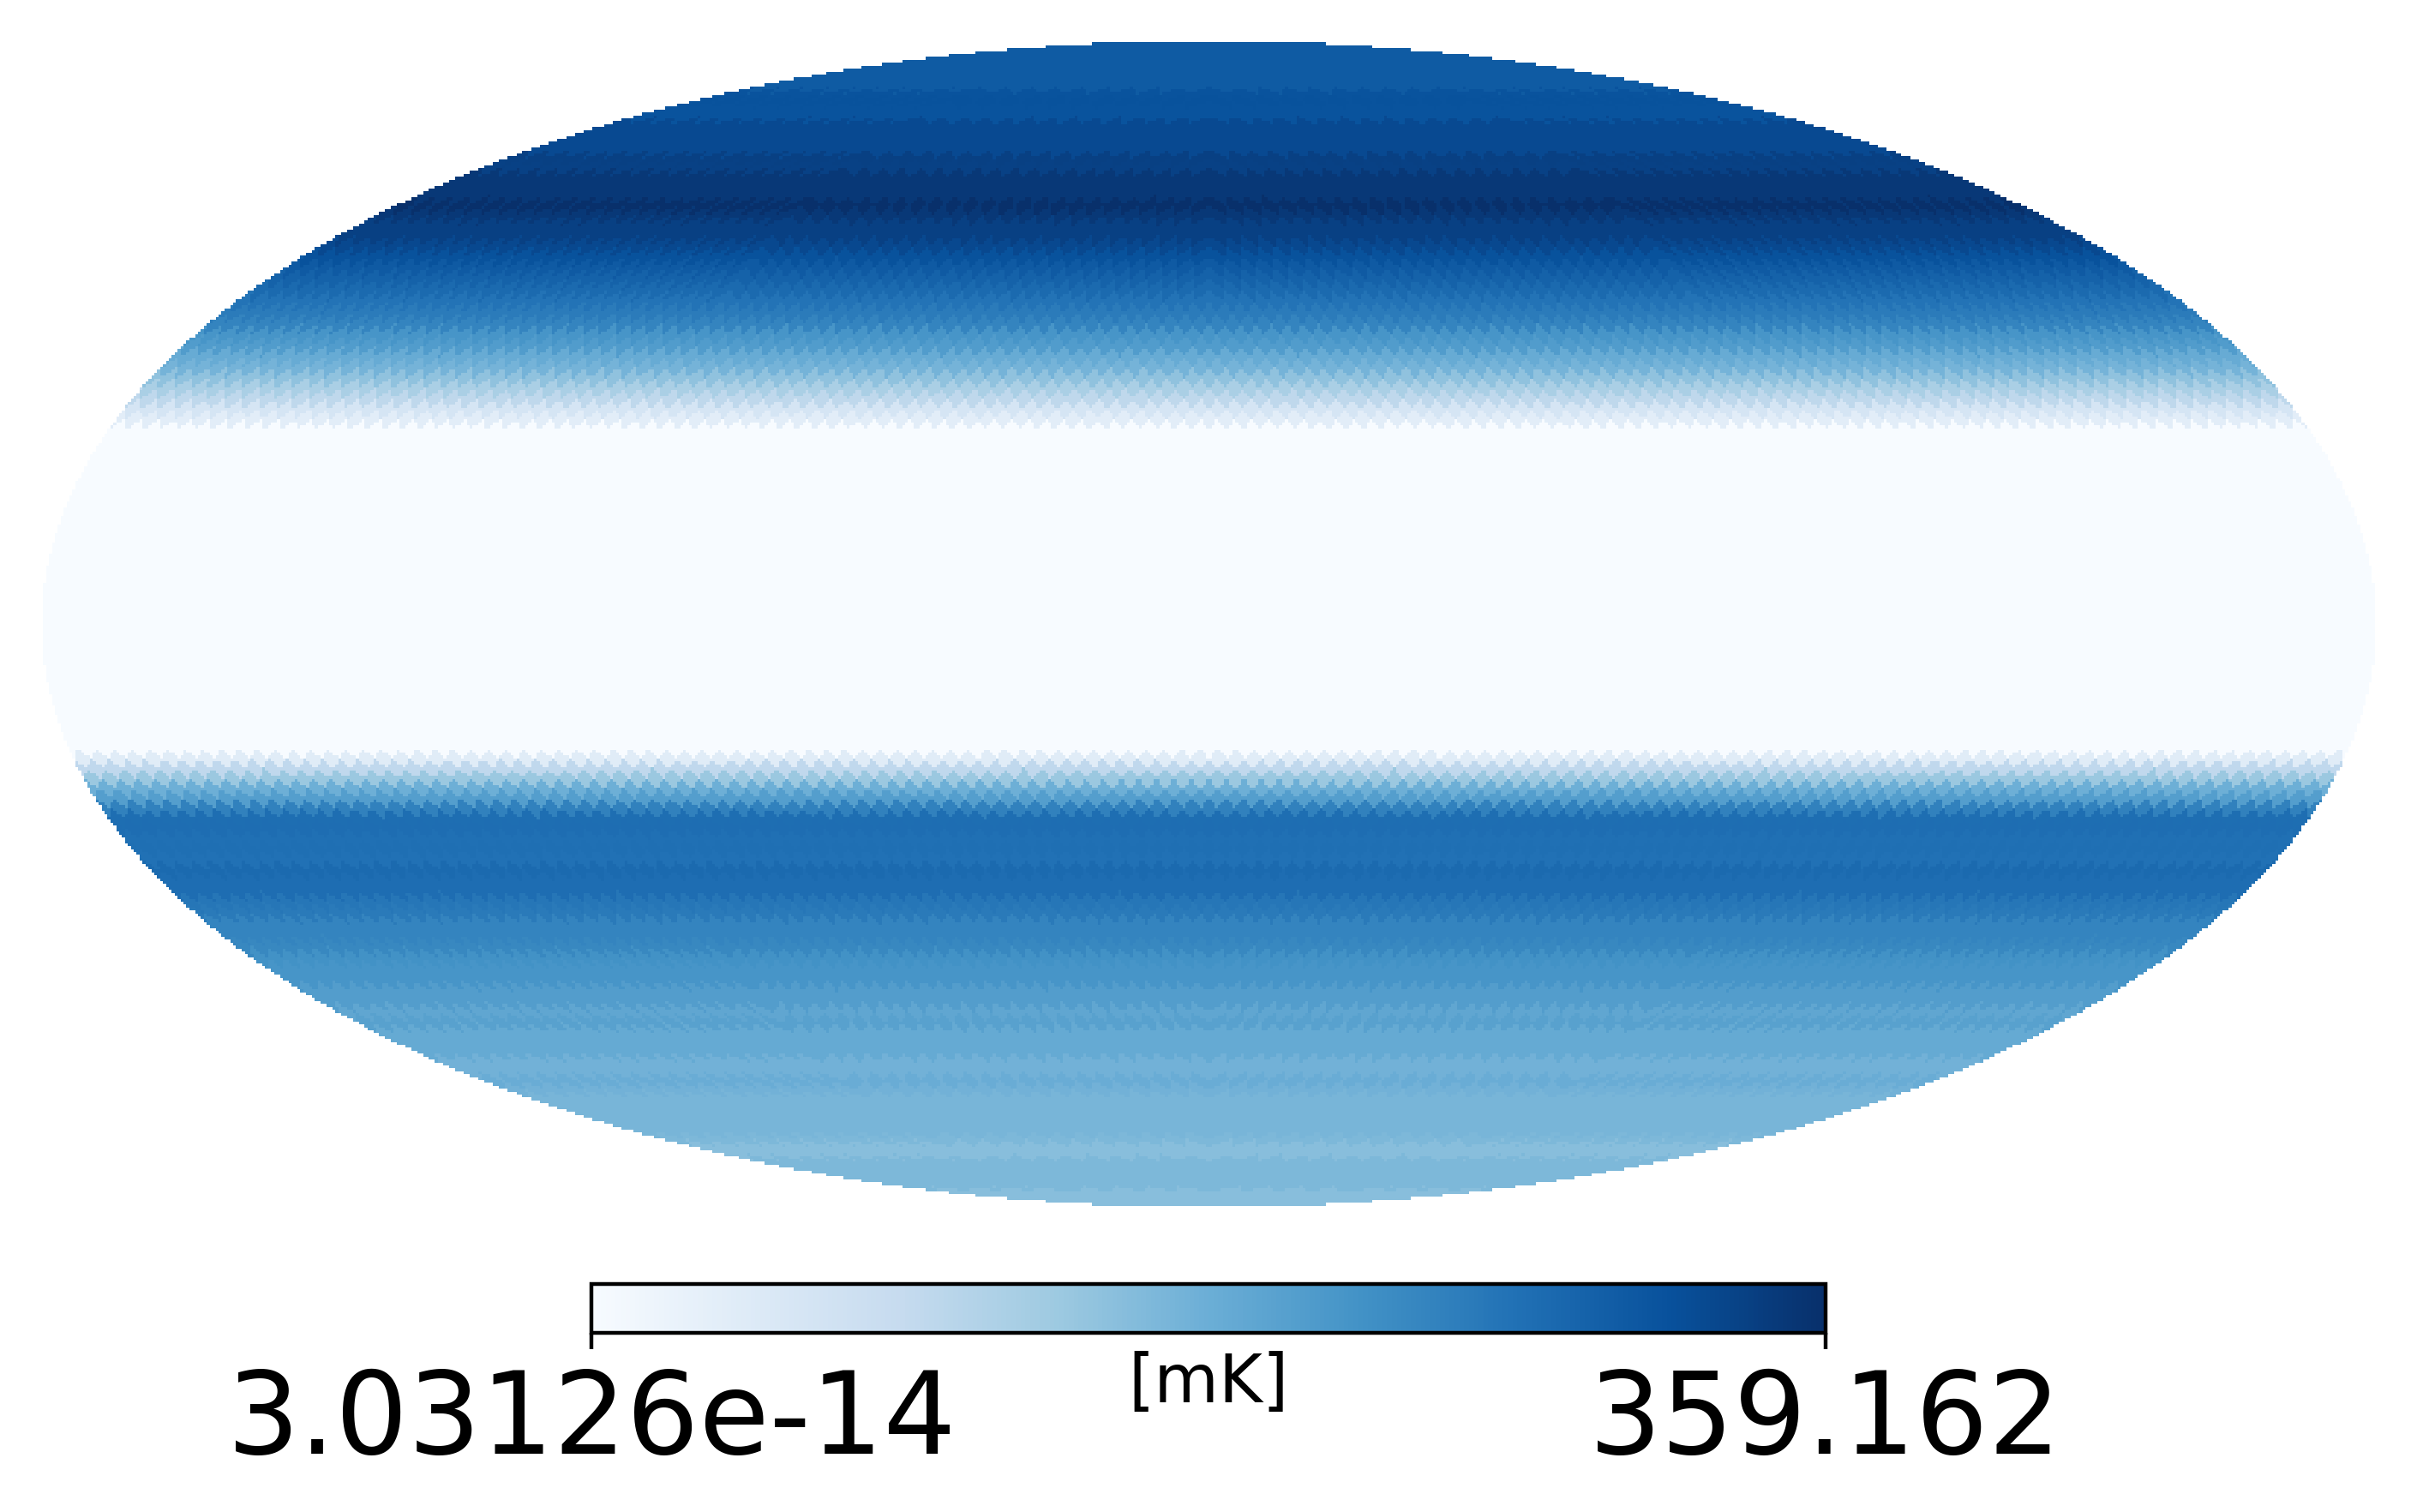

In [279]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(f_aqn, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", #min=0.1, max=0.27
            min = np.min(f_aqn).value, 
            max = np.max(f_aqn).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
# plt.savefig("../visuals/numerical-skymap"+".svg", bbox_inches='tight')
plt.show()

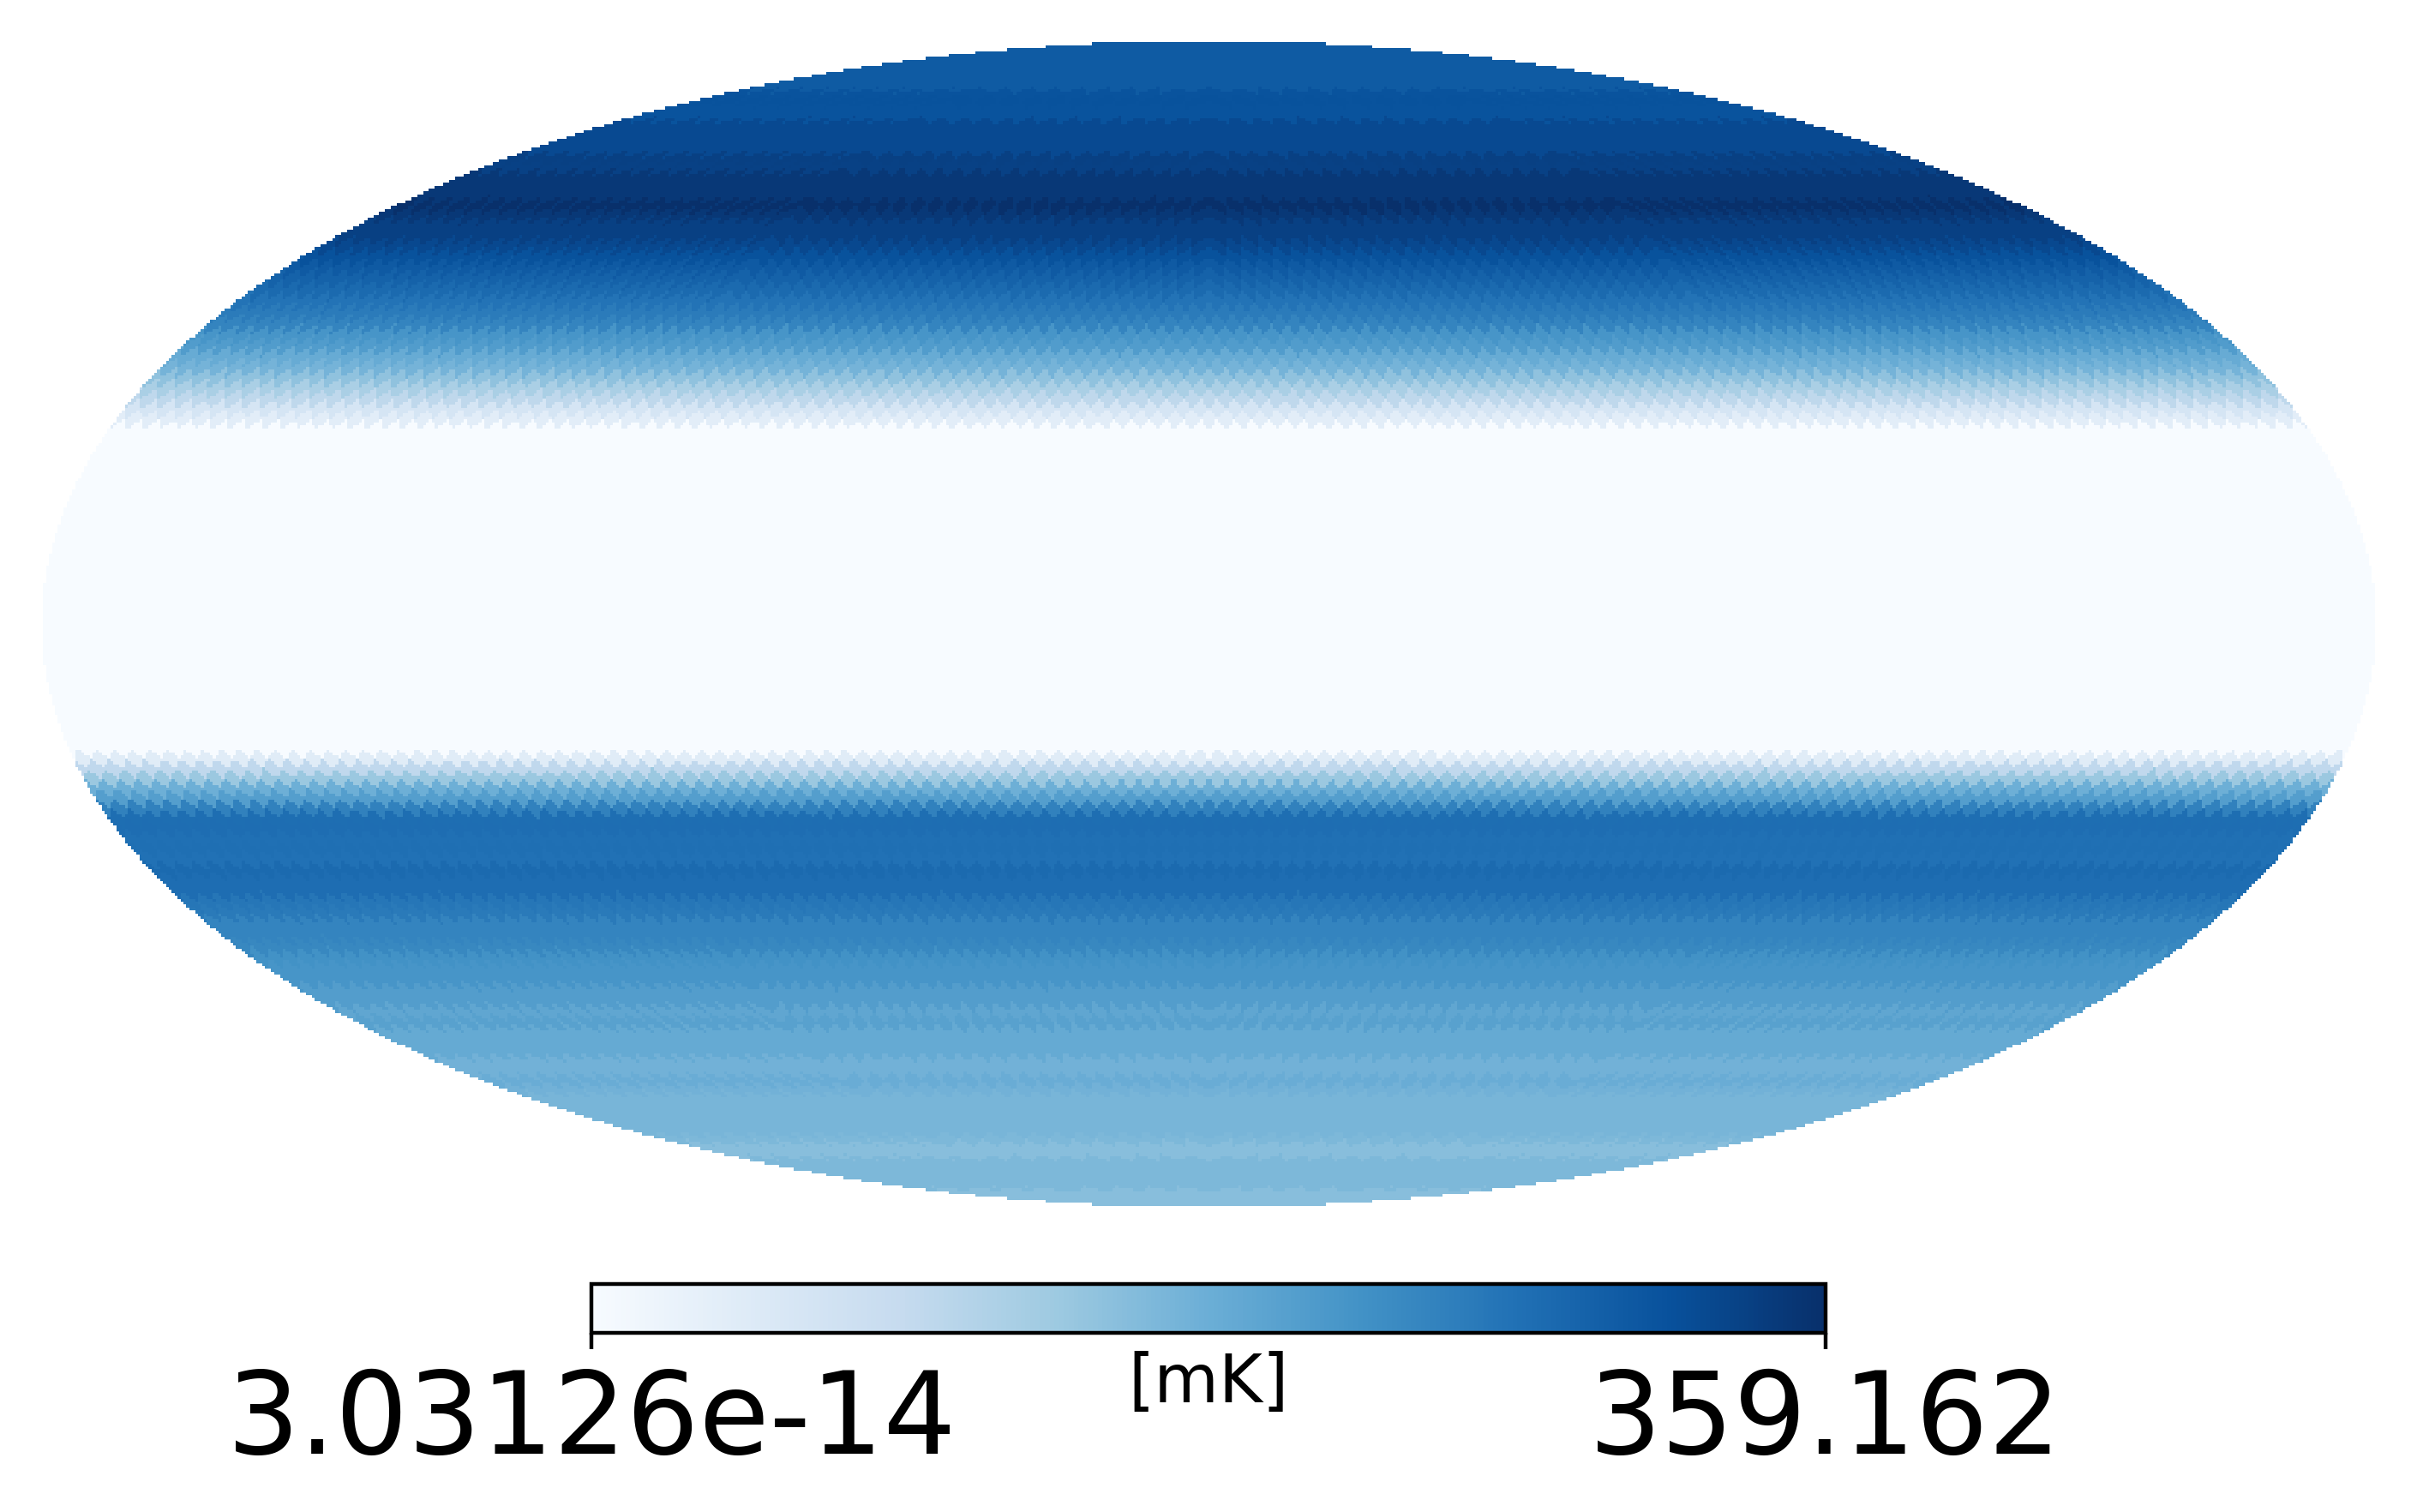

In [280]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(f_aqn, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", min = np.min(f_aqn).value, max = np.max(f_aqn).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
# plt.savefig(save_name+".svg", bbox_inches='tight')
plt.savefig("../visuals/analytical-skymap"+".svg", bbox_inches='tight')
plt.show()

In [302]:
f_aqn[f_aqn == np.min(f_aqn)] = 10000 * f_aqn.unit

In [298]:
# np.min(f_aqn[f_aqn!=-1*f_aqn.unit])

<Quantity 3.32460474e-14 ph / (Angstrom s sr cm2)>

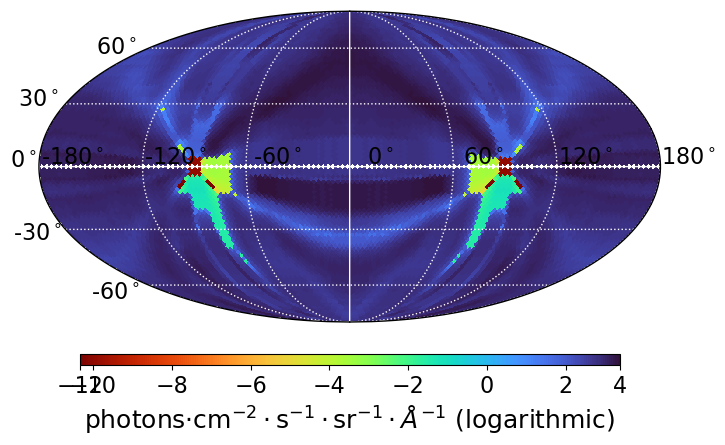

In [58]:
def create_skymap2(signal, signal_unit):
    
    theta, phi = hp.pix2ang(NSIDE, np.arange(len(signal)))
    # Convert theta to latitude in degrees
    latitude = np.degrees(np.pi / 2 - theta)
    
    # Create a mask for latitudes between -27 and 27 degrees
    # mask = (latitude >= -25) & (latitude <= 25)
    mask = (latitude >= 0) & (latitude <= 0)
    
    # Mask the data
    signal_plot = signal.copy()
    signal_plot[mask] = np.nan

    signal_plot = np.log10(signal_plot.value)
    min_value = np.nanmin(signal_plot)
    max_value = np.nanmax(signal_plot)
    
    f1 = plt.figure(figsize=(7.5,4.5), dpi=100)

    hp.mollview(signal_plot, 
                title="", 
                rot=(0,0,0),
                cmap='turbo_r', 
                fig=f1, 
                unit="",
                min = min_value,#min_value.value,#1,#np.min(f_aqn[f_aqn!=-1*f_aqn.unit]).value,
                max = max_value,#np.nanmax(signal).value,
                badcolor="white", cbar=False)
    #hp.graticule(dmer=360,dpar=360,alpha=0)  
    hp.graticule(dmer=60,dpar=30, alpha=1, color="white", linewidth=10)
    longitude_labels = [-180,-120,-60,0,60,120,180]
    label_size = 16
    for i in range(len(longitude_labels)):
        plt.text((-2.7+i)*0.66,0.02,str(longitude_labels[i])+"$^\circ$",size=16,horizontalalignment="center")

    latitude_labels = [-90,-60,-30,0,30,60,90]
    plt.text(-2.01,-0.47,"-30$^\circ$",size=label_size,horizontalalignment="center") 
    plt.text(-2.1,0,"0$^\circ$",size=label_size,horizontalalignment="center")
    plt.text(-2,0.39,"30$^\circ$",size=label_size,horizontalalignment="center") 
    plt.text(-1.5,0.73,"60$^\circ$",size=label_size,horizontalalignment="center") 
    plt.text(-1.51,-0.85,"-60$^\circ$",size=label_size,horizontalalignment="center") 
    # plt.text(0,-1.10,"Logarithmic",size=16,horizontalalignment="center")
    #plt.text(0,-1.37,"photons$\,\cdot\,$cm$^{-2}\cdot$A$^{-1}\cdot$s$^{-1}\cdot$sr$^{-1}$",size=10,horizontalalignment="center")
    # plt.text(0,-1.37,signal_unit,size=16,horizontalalignment="center")
    # plt.savefig("simulated_signal_sky_map.png")


    # Customize the colorbar
    fig = plt.gcf()
    ax = fig.axes[0]  # Get the axis of the mollview plot
    im = ax.get_images()[0]
    
    # Add a new colorbar
    cbar = fig.colorbar(im, orientation='horizontal', pad=0.075, aspect=50, shrink=0.75)
    cbar.set_label(r'photons$\cdot$cm$^{-2}\cdot$s$^{-1}\cdot$sr$^{-1}\cdot\AA^{-1}$ (logarithmic)', size=18)

    
    # Adjust the size of the colorbar
    cbar.ax.tick_params(labelsize=16)  # Adjust tick size
    # cbar.ax.set_xlabel('Unit', size=16) 
    plt.savefig("simulated_signal_sky_map.png", bbox_inches = "tight")
    plt.savefig("simulated_signal_sky_map.pdf", bbox_inches = "tight")

    plt.show()

create_skymap2(f_aqn, f_aqn.unit)

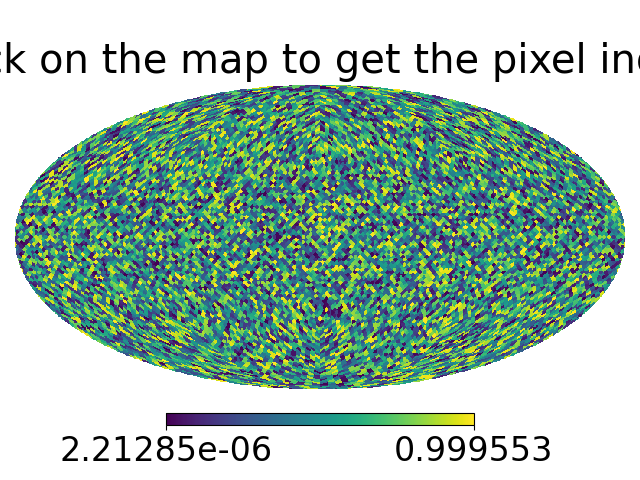

In [748]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Enable interactive plots in JupyterLab
%matplotlib widget

# Define the resolution of the map
nside = 32
npix = hp.nside2npix(nside)

# Create a sample map with random values
mymap = np.random.rand(npix)

# Plot the map using a Mollweide projection
fig = plt.figure()
hp.mollview(mymap, fig=fig, title="Click on the map to get the pixel index")

def on_click(event):
    # Get the x and y coordinates in the plot
    x, y = event.xdata, event.ydata
    if x is not None and y is not None:
        # Convert the plot coordinates to celestial coordinates (theta, phi)
        lon = np.degrees(x)
        lat = np.degrees(y)
        if lon < -180: lon = -180
        if lon > 180: lon = 180
        if lat < -90: lat = -90
        if lat > 90: lat = 90
        
        theta = np.radians(90 - lat)
        phi = np.radians(lon + 180)
        
        # Get the pixel index
        pix = hp.ang2pix(nside, theta, phi)
        print(f"Clicked on pixel index: {pix}")

# Connect the click event to the on_click function
fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()


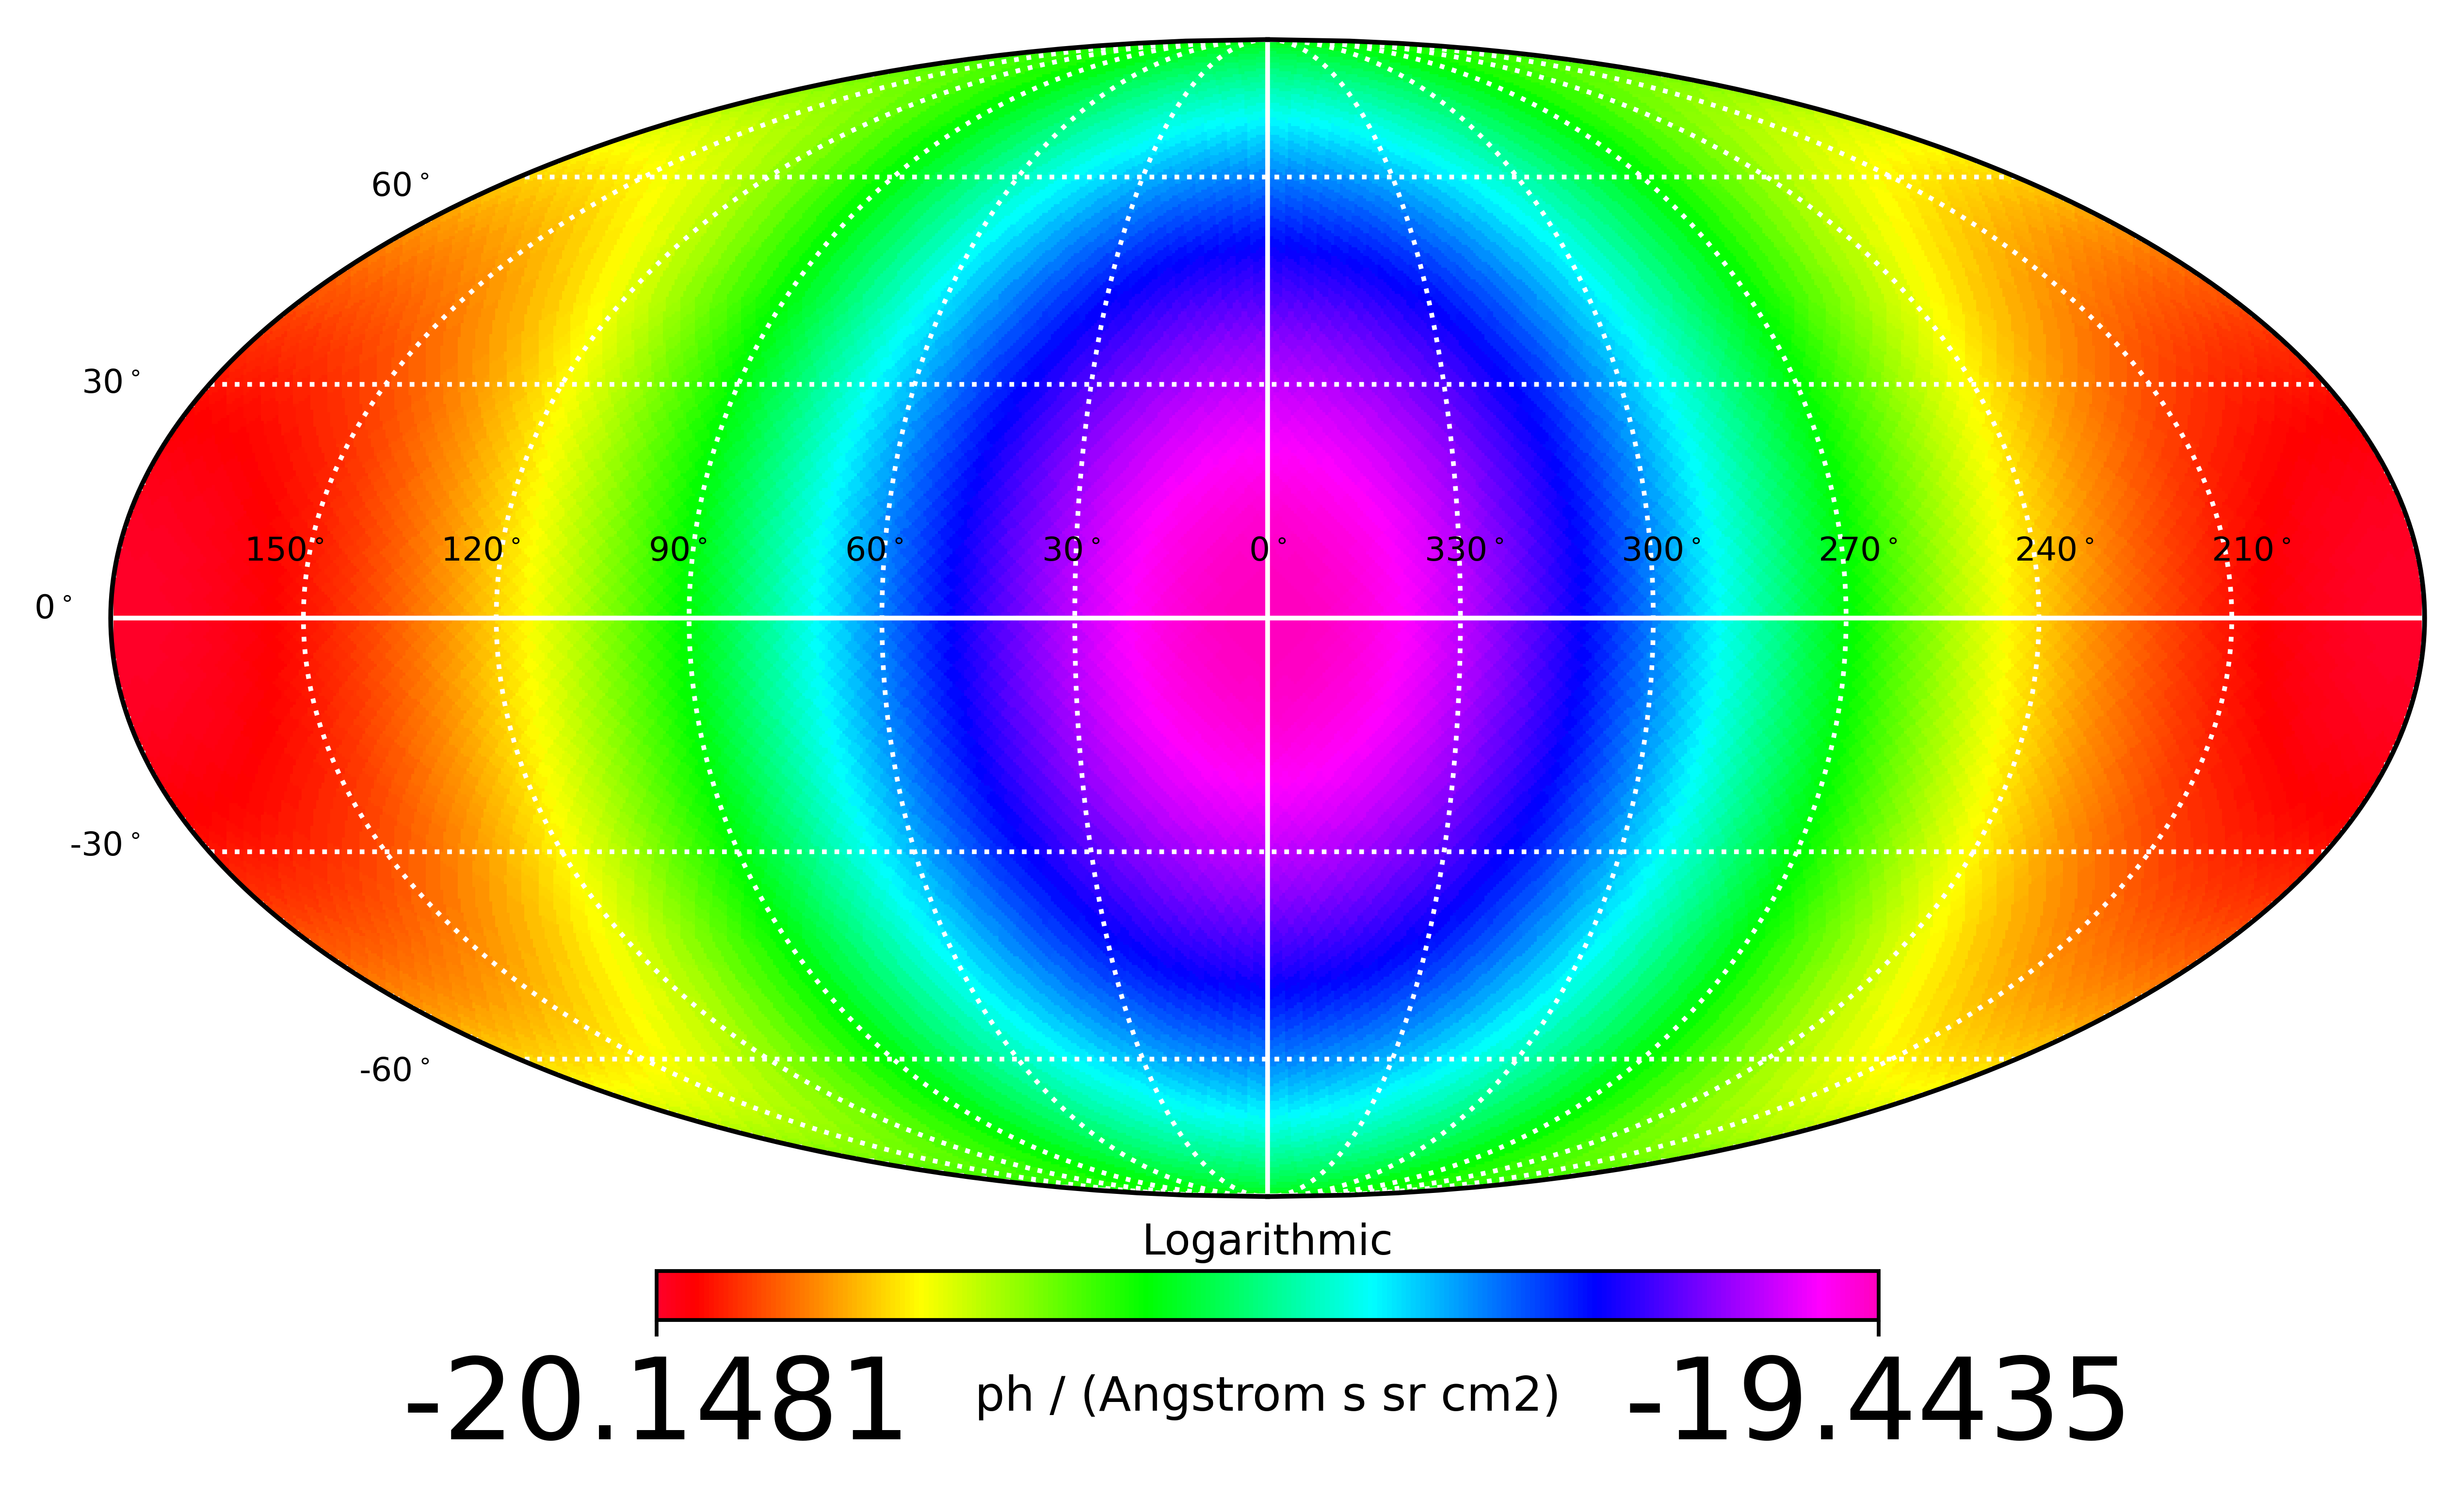

In [17]:
create_skymap2(f_aqn, f_aqn.unit, True)

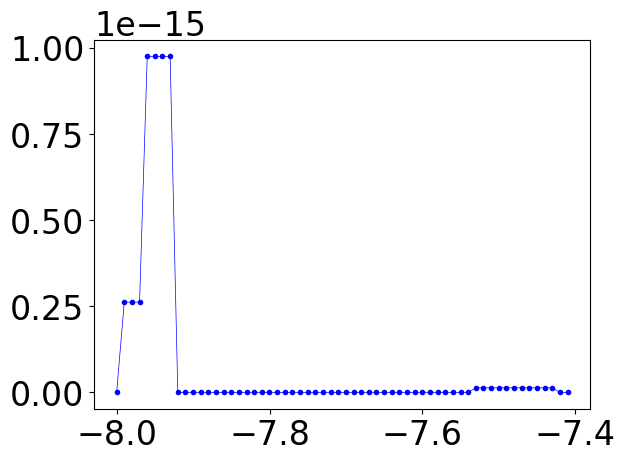

In [26]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)

# plt.figure(dpi=300)
plt.plot(x[:,centre_index], flat_aqn_emit[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)

In [18]:
analy = cubes.copy()

In [33]:
np.shape(cubes["temp_ion"])

(512, 512, 512)

In [62]:
R_aqn_cm

<Quantity 1.89647788e-05 cm>

In [25]:
cubes["r_eff"] = R_eff(R_aqn_cm,cubes["t_aqn_i"],cubes["temp_ion"]).to(u.cm)

In [57]:
analy["r_eff"] = R_eff(R_aqn_cm,analy["t_aqn_i"],analy["temp_ion"]).to(u.cm)

ValueError: cannot reshape array of size 841 into shape (24389,)

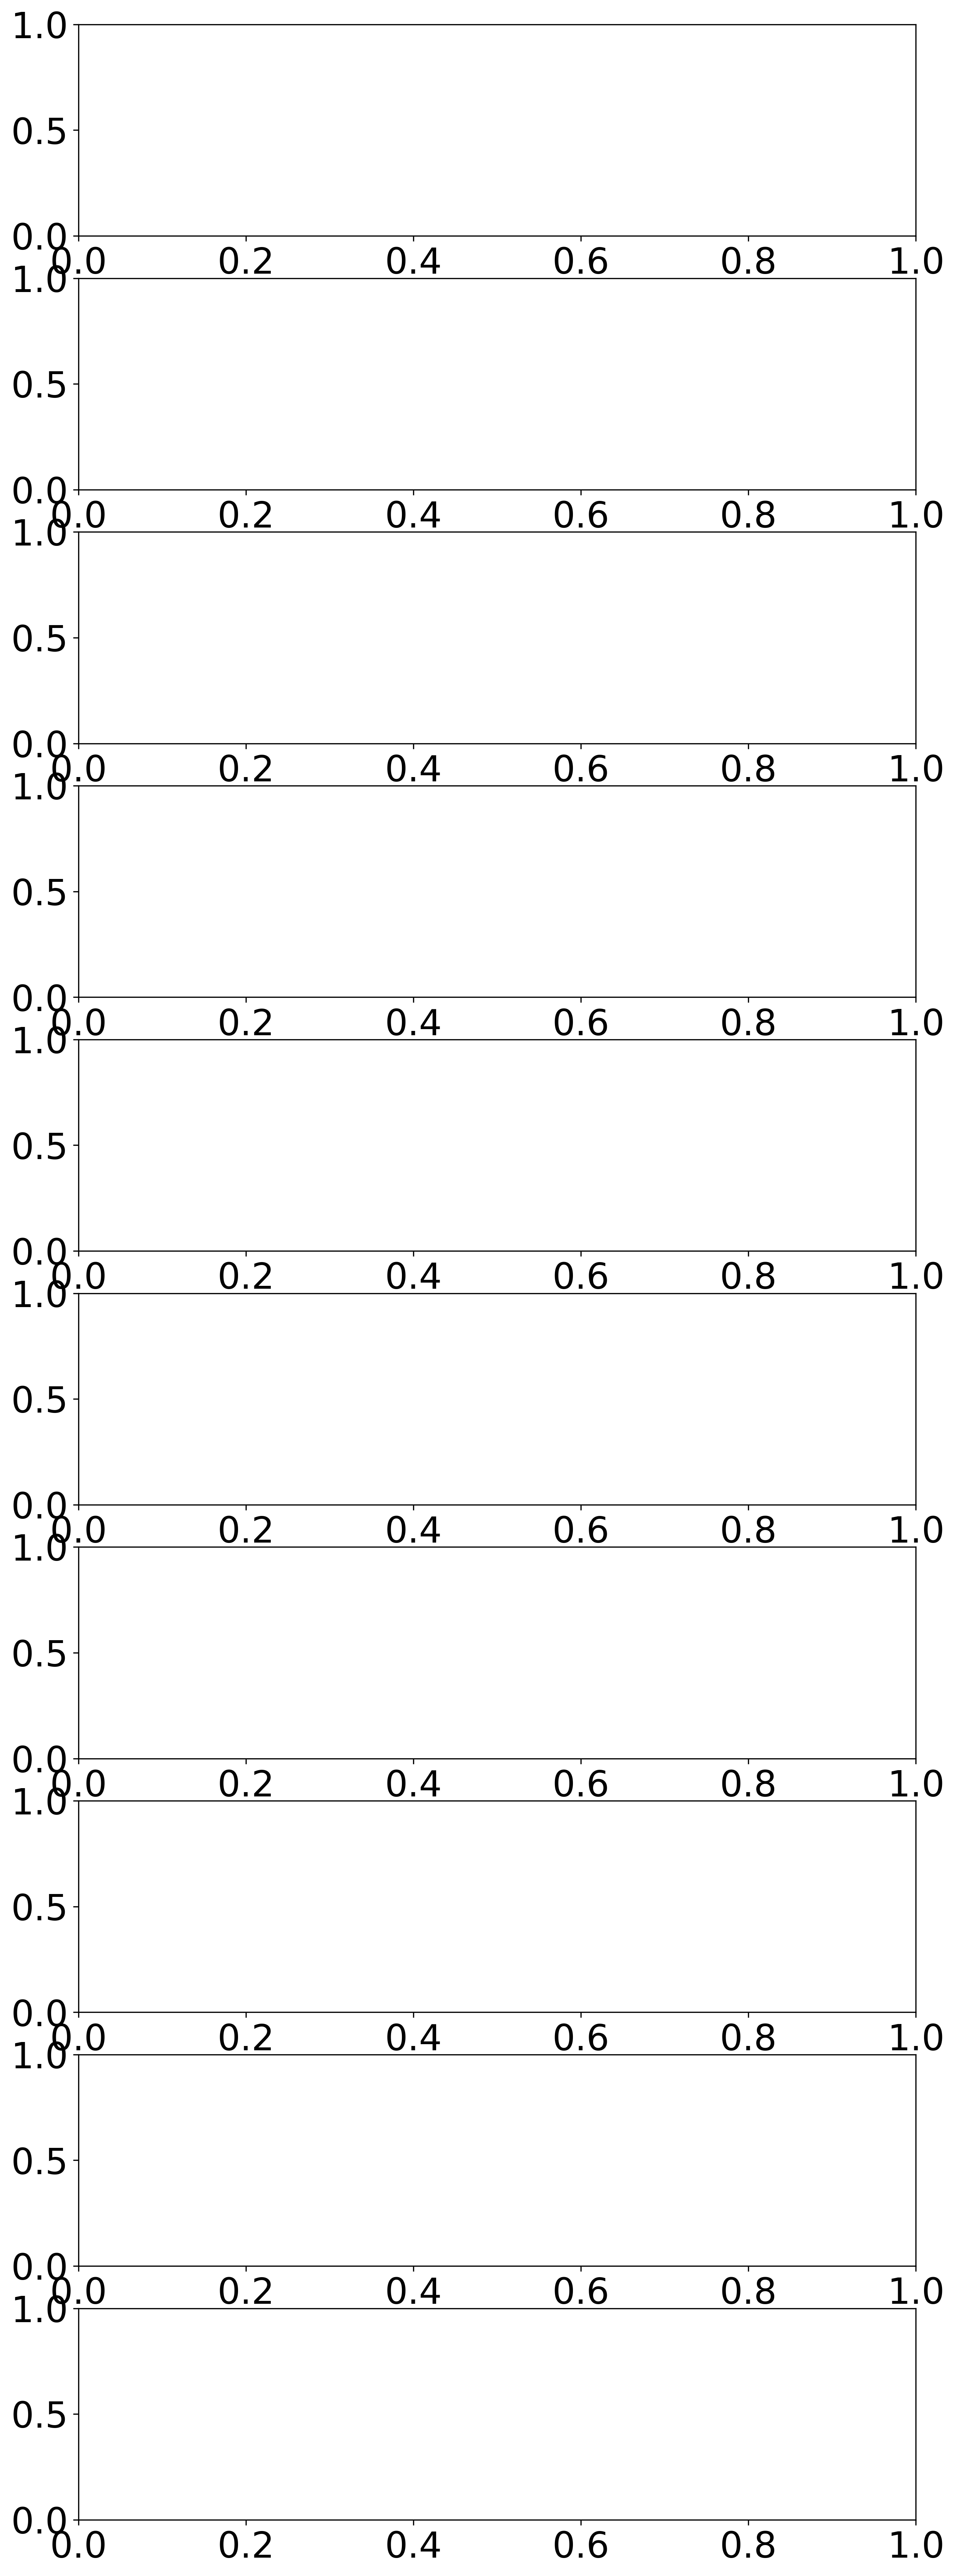

In [90]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)
quantities = ["dark_mat", "neut_gas", "ioni_gas", "temp_ion", "dv_ioni", "dv_neut", "t_aqn_i", "t_aqn_n", "aqn_emit", "r_eff"]

fig, axs = plt.subplots(len(quantities), 1, dpi=300, figsize=(10,3*len(quantities)))

for i, quantity in enumerate(quantities):
    flat_cube = np.reshape(cubes[quantity],(cube_dimension**3))
    axs[i].plot(x[:,centre_index], flat_cube[cube_indexes[:,centre_index]], linewidth=0.5, marker='.', color='b', markerfacecolor='k', markeredgecolor='k', markersize=3)
    # axs[i].plot(x[:,centre_index], analy[quantity][:,centre_index],       "r-", linewidth=1)
    axs[i].hlines(0, np.min(x[:,centre_index]), np.max(x[:,centre_index]), color="black")
    axs[i].set_xticks([])
    axs[i].set_ylabel(quantity + " [" + str(cubes[quantity].unit) + "]", size=15)
    axs[i].tick_params(axis='both', labelsize=15)
    text = axs[i].yaxis.get_offset_text()
    text.set_size(15)
    # axs[i].set_xticklabels(size=10)

axs[i].set_xticks(np.linspace(np.min(x[:,centre_index]), np.max(x[:,centre_index]), 10))
axs[i].set_xlabel("x [kpc]", size=15)

flat_cube = np.reshape(cubes[quantities[0]],(cube_dimension**3))
axs[0].plot(x[:,centre_index], flat_cube[cube_indexes[:,centre_index]], linewidth=0.5, marker='.', color='b', markerfacecolor='k', markeredgecolor='k', markersize=3, label="numerical")
# axs[0].plot(x[:,centre_index], analy[quantities[0]][:,centre_index],       "r-", linewidth=1, label="analytical")
axs[0].legend(fontsize=15)


flat_cube = np.reshape(cubes[quantities[6]],(cube_dimension**3))
max_t_loc = flat_cube[cube_indexes[:,centre_index]] == np.max(flat_cube[cube_indexes[:,centre_index]])
for i, quantity in enumerate(quantities):
    flat_cube = np.reshape(cubes[quantities[i]],(cube_dimension**3))
    print(flat_cube[cube_indexes[:,centre_index]][max_t_loc])
    axs[i].plot(x[:,centre_index][max_t_loc], flat_cube[cube_indexes[:,centre_index]][max_t_loc], "g.")
# axs[6].plot()

print("Numerical:")
for i, quantity in enumerate(quantities):
    flat_cube = np.reshape(cubes[quantity],(cube_dimension**3))
    print(quantity, flat_cube[cube_indexes[:,centre_index]][max_t_loc])
print("------------------------")
# print("Analytical:")
# for i, quantity in enumerate(quantities):
#     print(quantity, analy[quantity][:,centre_index][max_t_loc])

flat_cube = np.reshape(cubes[quantities[3]],(cube_dimension**3))
# axs[3].plot([x[:,centre_index][max_t_loc], x[:,centre_index][max_t_loc]], [flat_cube[cube_indexes[:,centre_index]][max_t_loc], analy[quantities[3]][:,centre_index][max_t_loc]], "g-")

print(T_AQN_ionized2(0.029*(1/u.cm**3), 0.003, f, g, 2.59*u.eV, R_aqn_cm))

plt.savefig("../visuals/central_sightline_integral_UV_numerical.svg", bbox_inches="tight")
plt.show()


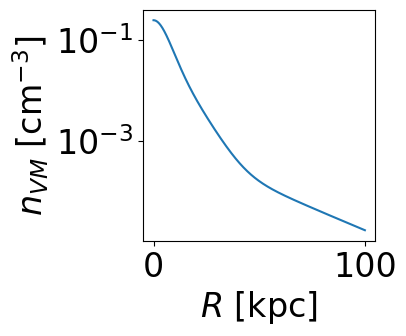

In [111]:

############# gas components ######################################### 

[a1_c, b1_c, c1_c, 
 a2_c, b2_c, c2_c, 
 a3_c, b3_c, c3_c, 
 a4_c, b4_c, c4_c, 
 a5_c, b5_c, c5_c, 
 a6_c, b6_c, c6_c] = [30.04649796,  0.4079755,  3.77607598,  
              1e3,3e-1,15,
             2.6e4,5e-2,3,
             0,0,0,
             0,0,0,
             0,0,0,]

[a1_w, b1_w, c1_w, 
 a2_w, b2_w, c2_w, 
 a3_w, b3_w, c3_w, 
 a4_w, b4_w, c4_w, 
 a5_w, b5_w, c5_w, 
 a6_w, b6_w, c6_w] = [1.1e0,1e-1,0.22,
              1.7e1,12e-1,110,
              0.575e4,8.2e-2,13.7,
             0,0,0,
             0,0,0,
             0,0,0,]

[a1_wh, b1_wh, c1_wh, 
 a2_wh, b2_wh, c2_wh, 
 a3_wh, b3_wh, c3_wh, 
 a4_wh, b4_wh, c4_wh, 
 a5_wh, b5_wh, c5_wh, 
 a6_wh, b6_wh, c6_wh] = [6.1e1,4.4e-1,1.8,
              9e2,9.2e-2,2.8,
              1.5e4,7e-2,9,
             0,0,0,
             0,0,0,
             0,0,0,]

[a1_h, b1_h, c1_h, 
 a2_h, b2_h, c2_h, 
 a3_h, b3_h, c3_h, 
 a4_h, b4_h, c4_h, 
 a5_h, b5_h, c5_h, 
 a6_h, b6_h, c6_h] = [2e2,4e-1,9.5,
              1e4,10e-2,6,
              2.6e4,3e-2,3.1,
              0,0,0,
              0,0,0,
              0,0,0,]

from astropy.cosmology import WMAP7             # WMAP 7-year cosmology
rho_crit_z05_cgs = WMAP7.critical_density(0.5)  # critical density at z = 0.5  
rho_crit_z05_si = rho_crit_z05_cgs.to(u.kg / u.m**3)
r_vir_kpc = 233 * u.kpc

def rho_gas_component(R_kpc,gas_component):
    x = (R_kpc/r_vir_kpc).value
    if gas_component == "cold":
        return  (a1_c / (1+(x/b1_c)**2)**c1_c + \
                 a2_c / (1+(x/b2_c)**2)**c2_c + \
                 a3_c / (1+(x/b3_c)**2)**c3_c) * rho_crit_z05_si
    if gas_component == "warm":
        return  (a1_w / (1+(x/b1_w)**2)**c1_w + \
                 a2_w / (1+(x/b2_w)**2)**c2_w + \
                 a3_w / (1+(x/b3_w)**2)**c3_w) * rho_crit_z05_si
    if gas_component == "warm-hot":
        return  (a1_wh / (1+(x/b1_wh)**2)**c1_wh + \
                 a2_wh / (1+(x/b2_wh)**2)**c2_wh + \
                 a3_wh / (1+(x/b3_wh)**2)**c3_wh) * rho_crit_z05_si 
    if gas_component == "hot":
        return  (a1_h / (1+(x/b1_h)**2)**c1_h + \
                 a2_h / (1+(x/b2_h)**2)**c2_h + \
                 a3_h / (1+(x/b3_h)**2)**c3_h) * rho_crit_z05_si 

def n_gas_component(R_none, gas_component):
    return rho_gas_component(R_none*u.kpc, gas_component) / cst.m_p.si


def rho_gas(R_none):
    return rho_gas_component(R_none,"cold")# + rho_gas_component(R_none,"warm") + rho_gas_component(R_none,"warm-hot") + rho_gas_component(R_none,"hot")

def n_vm(R_none):
    return rho_gas(R_none) / cst.m_p.si

ionized_gas = True
########################################################################

# if disp:
plt.figure(dpi=100,figsize=(3,3))
plt.plot(np.arange(l_min,1e2,0.1), n_vm(np.arange(l_min,1e2,0.1)).to(1/u.cm**3))
plt.xlabel("$R$ [kpc]")
plt.ylabel("$n_{VM}$ [cm$^{-3}$]")
plt.yscale("log")
# plt.xscale("log")
# plt.title(vm_model, size=15)
#plt.savefig(dm_model_name+".png", bbox_inches='tight')
plt.show()





In [108]:
n_vm(np.arange(l_min,1e3,0.1)).to()

<Quantity [2.47678935e+05, 2.47626000e+05, 2.47467287e+05, ...,
           5.69779741e-06, 5.69362198e-06, 5.68945004e-06] 1 / m3>

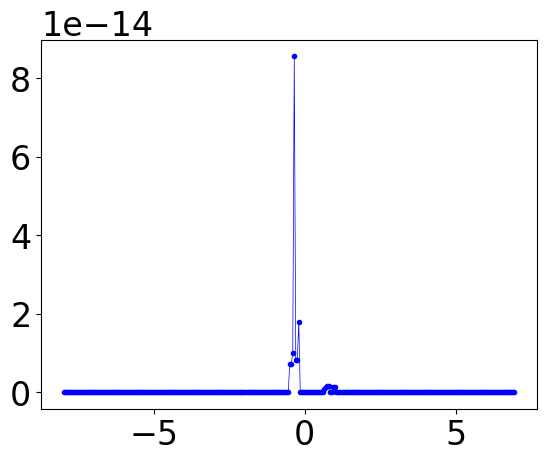

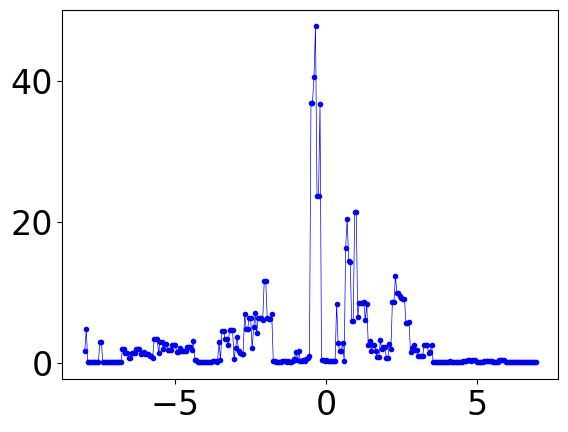

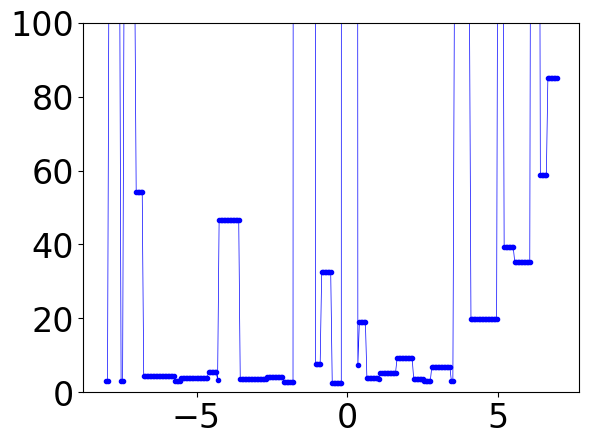

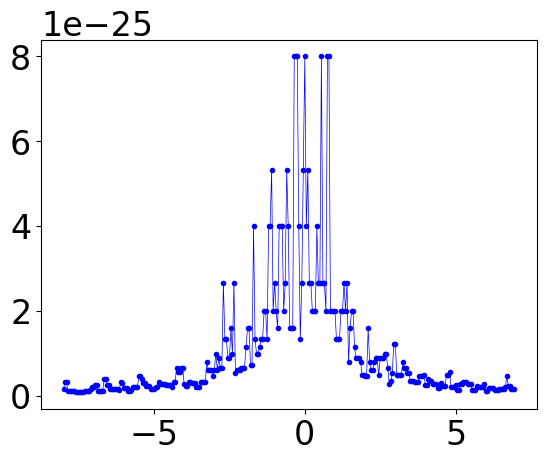

In [28]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)

# plt.figure(dpi=300)
plt.plot(x[:,centre_index], flat_aqn_emit[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
# plt.ylim(0,1e-16)
plt.show()

flat  = np.reshape(cubes["t_aqn_i"],(cube_dimension**3))
plt.plot(x[:,centre_index], flat[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
plt.show()

flat  = np.reshape(cubes["temp_ion"],(cube_dimension**3))
plt.plot(x[:,centre_index], flat[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
plt.ylim(0,100)
plt.show()

flat  = np.reshape(cubes["dark_mat"],(cube_dimension**3))
plt.plot(x[:,centre_index], flat[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
plt.show()



In [83]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)
plt.plot(x[:,centre_index], cubes["aqn_emit"][:,centre_index], "b.-", linewidth=0.5)
plt.show()

IndexError: index 5952 is out of bounds for axis 1 with size 512

In [28]:
R[:,centre_index]

array([8.        , 7.00024804, 6.00057874, 5.00104167, 4.00173592,
       3.00289244, 2.00520213, 1.01208112, 0.16667571, 1.01550647,
       2.00866274, 3.00635969, 4.00520551, 5.00451234, 6.00405   ])

In [40]:
x[:,centre_index]

array([-8.00000000e+00, -7.00021704e+00, -6.00043407e+00, -5.00065111e+00,
       -4.00086815e+00, -3.00108519e+00, -2.00130222e+00, -1.00151926e+00,
       -1.73629953e-03,  9.98046663e-01,  1.99782963e+00,  2.99761259e+00,
        3.99739555e+00,  4.99717851e+00,  5.99696148e+00])

In [31]:
z[:,centre_index]

array([0.        , 0.02083333, 0.04166667, 0.0625    , 0.08333333,
       0.10416667, 0.125     , 0.14583333, 0.16666667, 0.1875    ,
       0.20833333, 0.22916667, 0.25      , 0.27083333, 0.29166667])

In [21]:
np.shape(R)

(15, 12288)

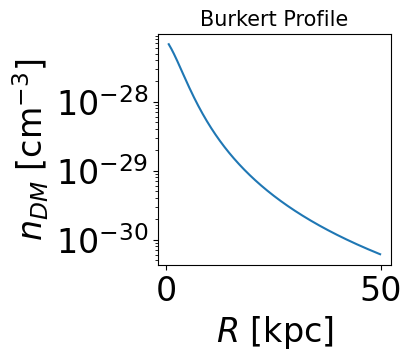

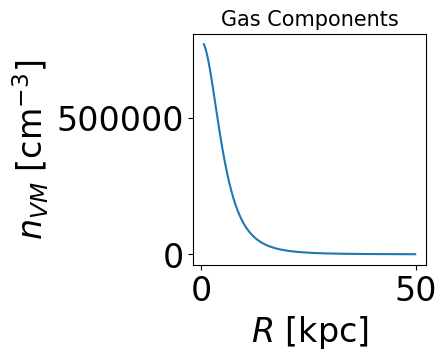

NSIDE is 32
NPIX is 12288
dOmega is 0.0010226538585904274
[[1.18918529e-20 1.15854849e-20 1.15854849e-20 ... 1.15854849e-20
  1.15854849e-20 1.18918529e-20]
 [1.12765772e-20 1.07518833e-20 1.07518833e-20 ... 1.07518833e-20
  1.07518833e-20 1.12765772e-20]
 [1.03025829e-20 9.61722916e-21 9.61722916e-21 ... 9.61722916e-21
  9.61722916e-21 1.03025829e-20]
 ...
 [1.00612265e-27 9.60541100e-28 9.60541100e-28 ... 9.60541100e-28
  9.60541100e-28 1.00612265e-27]
 [9.28798701e-28 8.87549047e-28 8.87549047e-28 ... 8.87549047e-28
  8.87549047e-28 9.28798701e-28]
 [8.58807557e-28 8.21436810e-28 8.21436810e-28 ... 8.21436810e-28
  8.21436810e-28 8.58807557e-28]] mK / cm
[[1.18918529e-20 1.15854849e-20 1.15854849e-20 ... 1.15854849e-20
  1.15854849e-20 1.18918529e-20]
 [1.12765772e-20 1.07518833e-20 1.07518833e-20 ... 1.07518833e-20
  1.07518833e-20 1.12765772e-20]
 [1.03025829e-20 9.61722916e-21 9.61722916e-21 ... 9.61722916e-21
  9.61722916e-21 1.03025829e-20]
 ...
 [1.00612265e-27 9.60541100e-28 

In [156]:
F_tot_galex = simulate_signal(m_aqn_kg)

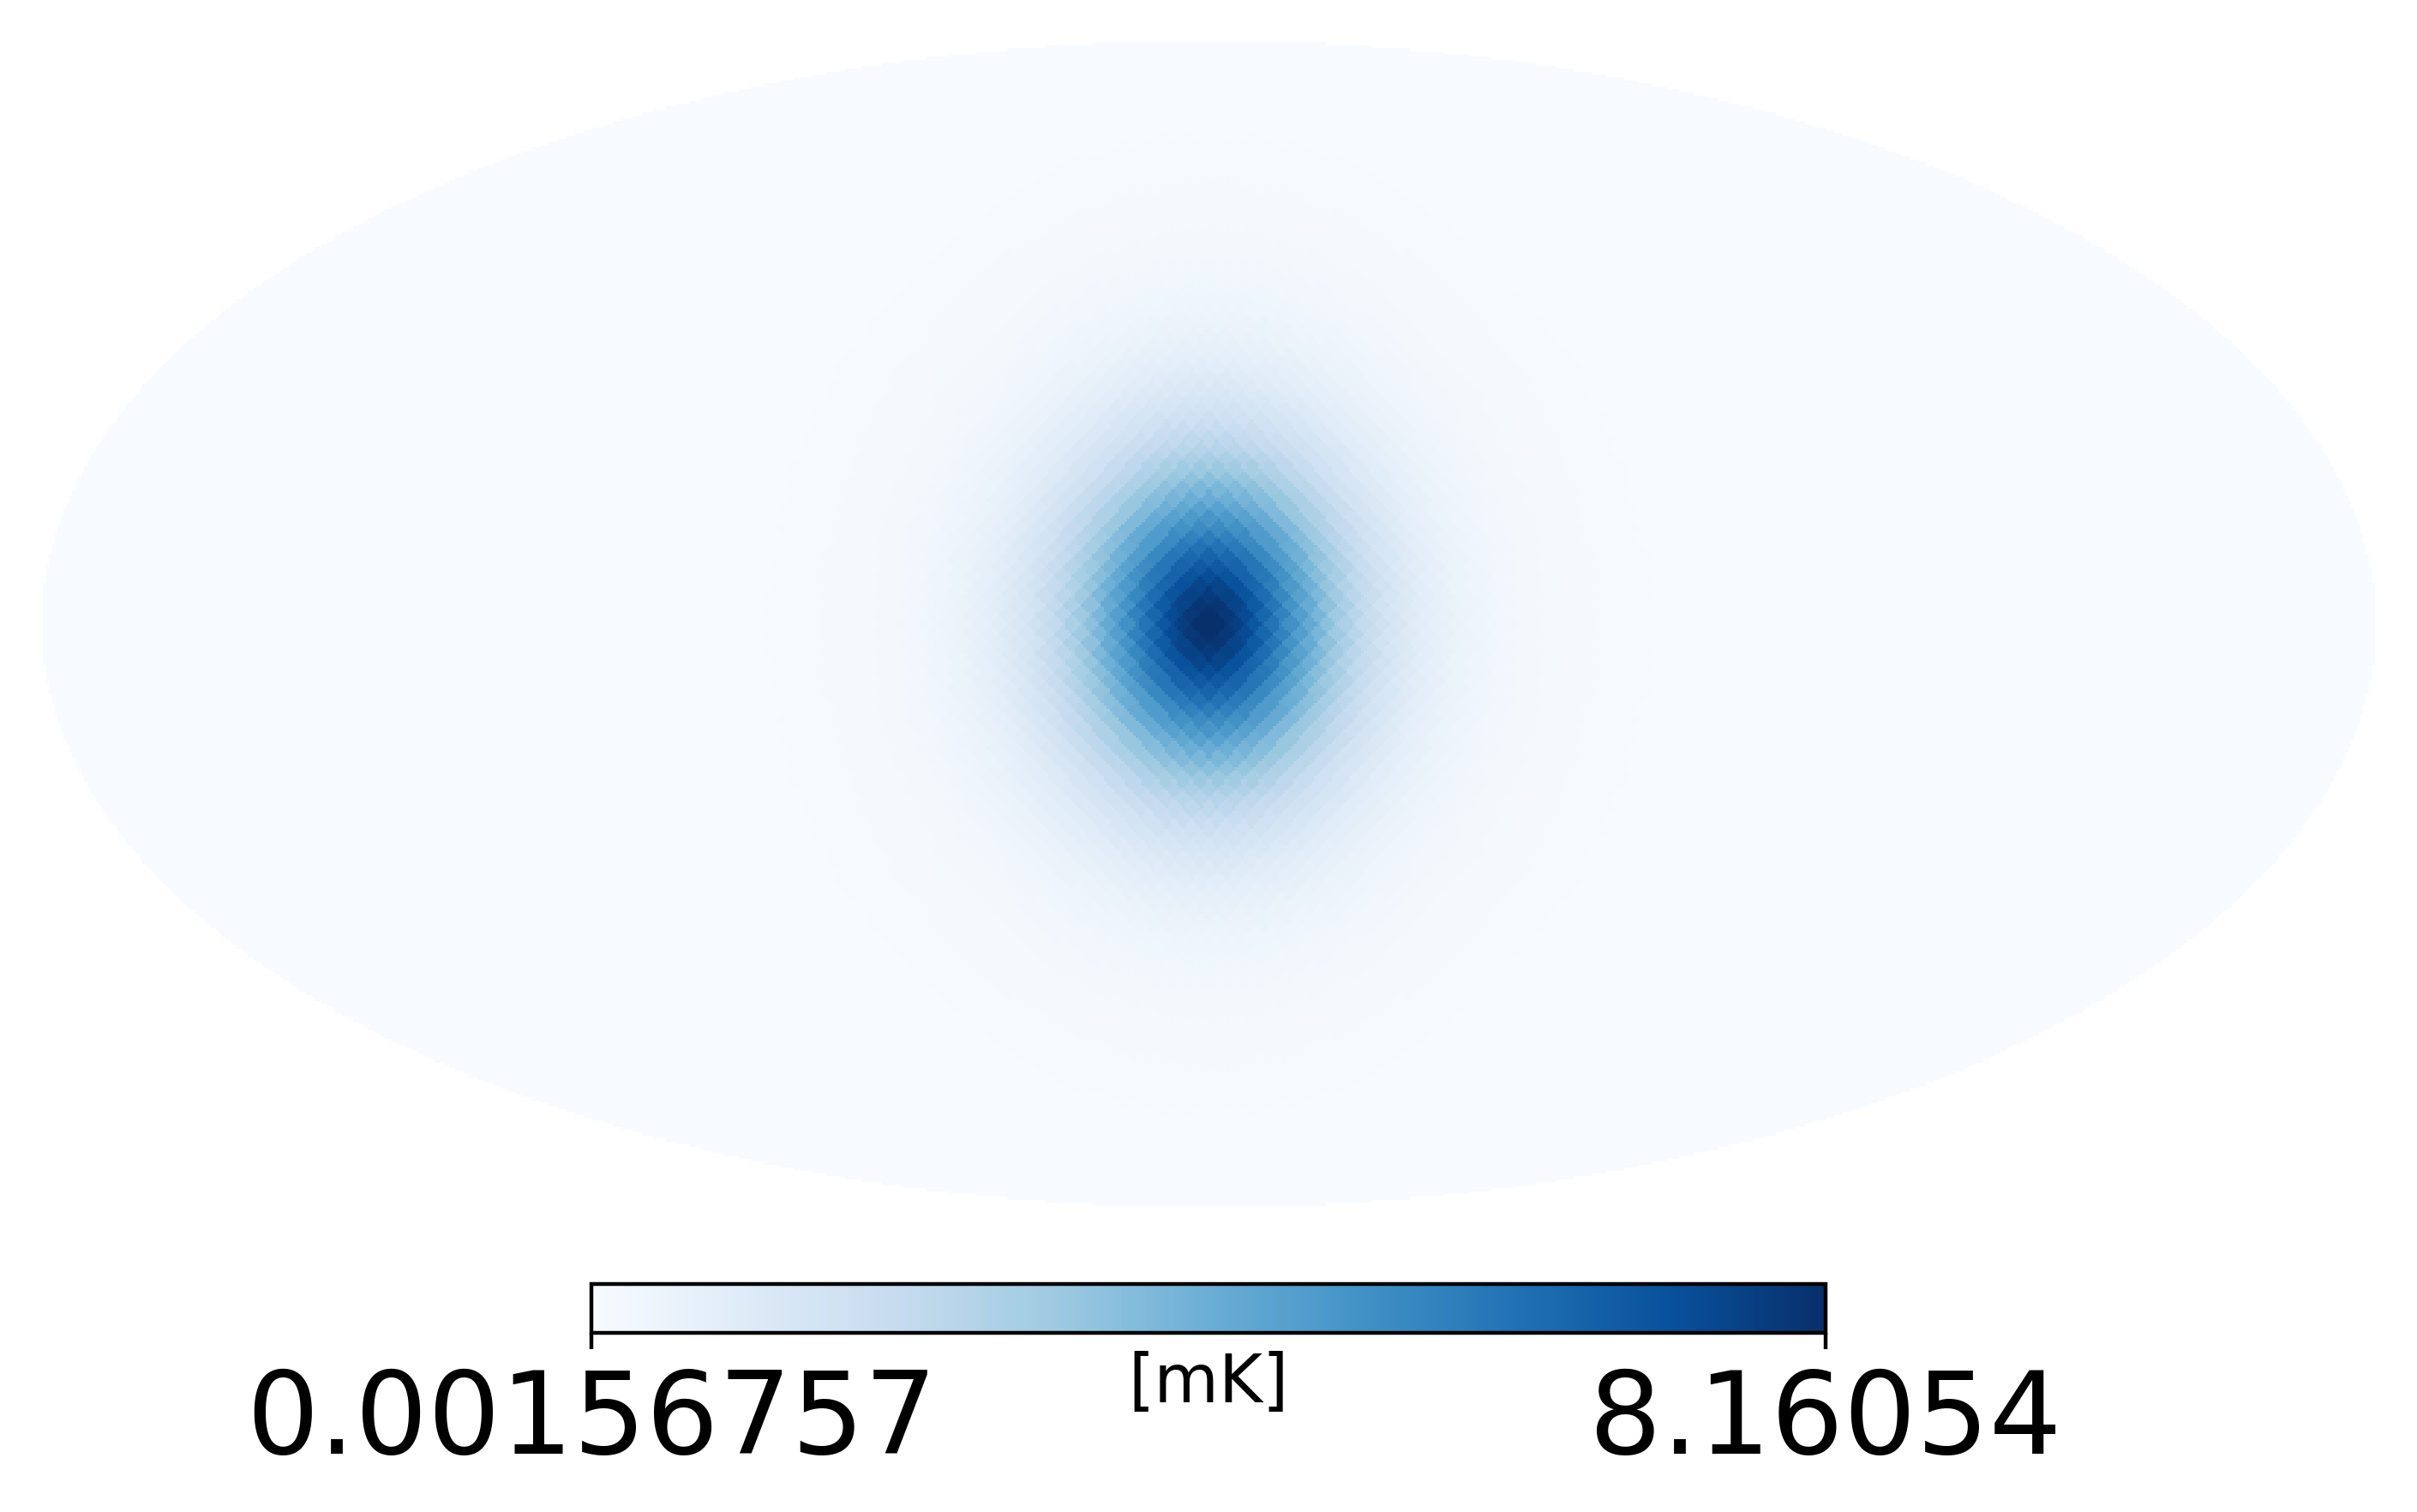

In [204]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(F_tot_galex, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", min = np.min(F_tot_galex).value, max = np.max(F_tot_galex).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
# plt.savefig(save_name+".svg", bbox_inches='tight')
plt.show()